# Figures for Water Availability Article

This notebook produces the figures contained in "Evaluating an Earth system model from a water user perspective" by Mari Tye et al. 2023. Most data analysis was performed by Ming Ge, data are save elsewhere. Some code snippets for figures are also reproduced from code by Ming Ge. 

## Figures in main text

### Import Packages and Data

NB using environment cloned from NCAR package library with all packages up to date May 17 2023. Kernel npl2023a_mrt

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, patches
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.util as cutil
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatter 
import matplotlib.colors as mcolors
import regionmask
from geocat.viz import util as gvutil
from IPython.display import IFrame
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import geoplot as gplt
import geopandas as gpd
import mapclassify as mc
import plotly.express as px
import plotly.graph_objects as go

from matplotlib.ticker import FixedLocator
import matplotlib.gridspec as gridspec


from matplotlib.lines import Line2D # to create independent legend with lines

Set directories and id file names

In [3]:
dir_plot = '/glade/u/home/maritye/Plots/PSIF/'
dir_cesm = '/glade/campaign/mmm/c3we/mingge/CESM/RUNOFF/'
dir_liv  = '/glade/campaign/mmm/c3we/mingge/LIVNEH/' 

In [4]:
# Precipitation data
ds_prec_cesm_huc2 = xr.open_dataset('Data/CESM2_PrecIndices_HUC2.nc')
ds_prec_liv_huc2 = xr.open_dataset('Data/Livneh_PrecIndices_HUC2.nc')
ds_prec_huc2_fut = xr.open_dataset('Data/CESM2_PrecIndices_HUC2_future.nc')
# runoff daata with figures

In [5]:
### Bring in the shape file with the HUC2 regions
flnm_shp = '/glade/work/maritye/Data/masks/HUC02_conus.shp'
shp_gpd = gpd.read_file(flnm_shp)

hucnum = shp_gpd['hru_id']
hucname = shp_gpd['Name']
hucref = shp_gpd['str_id']

# Make sure the "id" column is an integer
shp_gpd.hru_id = shp_gpd.hru_id.astype(str).astype(int)

# Create region mask
huc2_regions = regionmask.Regions(
    shp_gpd.geometry, names=shp_gpd.hru_id, numbers=hucnum, abbrevs=shp_gpd.str_id, name="HUC2"
)

In [6]:
# find areas to include in the text
shp_gpd.AreaAcres.min()*0.0015625

40641.897137812506

In [7]:
shp_gpd.AreaAcres.max()*0.0015625

4612347604.0625

In [8]:
shp_gpd.AreaSqKm.max()

11945936016.0

In [9]:
shp_gpd.AreaSqKm.min()

105262.12

In [10]:
shp_gpd

,OBJECTID,LoadDate,AreaAcres,AreaSqKm,States,HUC2,Name,str_id,hru_id,geometry
0,2,2012-06-11,2.601081e+07,1.052621e+05,"AL, TN, GA, NC",06,Tennessee Region,TN,6,"POLYGON ((-81.72338 37.24046, -81.72290 37.240..."
1,4,2012-06-11,1.203574e+08,4.870697e+05,"AZ, MX, NM",15,Lower Colorado Region,LCO,15,"POLYGON ((-115.07860 39.30054, -115.07836 39.2..."
2,5,2012-06-11,7.395276e+08,2.992765e+06,CA,18,California Region,CA,18,"MULTIPOLYGON (((-121.63690 43.34029, -121.6371..."
3,6,2012-06-11,1.810547e+08,7.327030e+05,"FL, AL, MS, GA, SC, NC",03,South Atlantic-Gulf Region,SA,3,"POLYGON ((-79.47821 37.50766, -79.47766 37.507..."
4,8,2012-06-11,1.215996e+08,4.920967e+05,"IL, MO, IA, MN, WI",07,Upper Mississippi Region,UM,7,"POLYGON ((-94.32910 47.76904, -94.32969 47.767..."
5,9,2012-06-11,6.832390e+07,2.764972e+05,"LA, TN, MS, KY, AR",08,Lower Mississippi Region,LM,8,"POLYGON ((-90.33322 37.84773, -90.33299 37.847..."
6,10,2012-06-11,5.824078e+07,2.356923e+05,"MN, MT, ND, CN",09,Souris-Red-Rainy Region,RR,9,"MULTIPOLYGON (((-104.31587 50.15139, -104.3146..."
7,11,2012-06-11,3.339566e+08,1.351476e+06,"MO, KS, CO, NE, IA, SD, WY, MT",10,Missouri Region,MR,10,"POLYGON ((-109.31973 49.73911, -109.31955 49.7..."
8,12,2012-06-11,7.258001e+07,2.937211e+05,"NM, CO, AZ, UT, WY",14,Upper Colorado Region,UC,14,"POLYGON ((-110.03805 43.45087, -110.03649 43.4..."
9,13,2012-06-11,1.673852e+09,6.773846e+06,"NV, OR, ID, WY, CA, WA",17,Pacific Northwest Region,PN,17,"POLYGON ((-119.28727 50.63219, -119.28608 50.6..."


HUC region 1 (NE ) should be  73,753 sq mi (191,020 km2)

region 4 GL should be 141,984 sq mi (367,740 km2)

https://en.wikipedia.org/wiki/Water_resource_region   I think that the area of the Lakes has been included in the polygon

### Figure 2
Figure 1 is a schematic produced in power point.

Figure 2 is just of the HUC2 region shapes. Try two versions - one with reliability colours and one with just the region numbers

In [6]:
# Option one black and white
import matplotlib.patheffects as pe

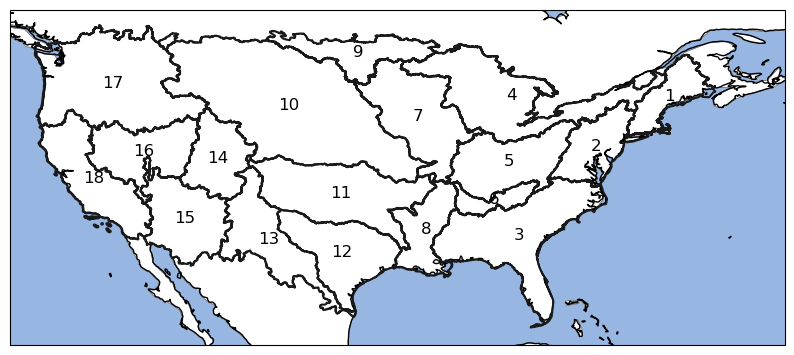

In [11]:
text_kws = dict(
    bbox = dict(color="none"),
    fontsize=12,)

fig = plt.subplots(1, 1, figsize = (10,7), subplot_kw=dict(projection=ccrs.PlateCarree()))

ax = huc2_regions.plot(add_ocean= True, text_kws = text_kws)

ax.coastlines()
ax.set_extent([233,300,23,52], crs=ccrs.PlateCarree())

plt.savefig(dir_plot + 'Figure2_HUCregs_bw.png')

### Appendix B Figure 1
Mean daily rainfall from Ming's figures

In [7]:
from importlib import reload
import psif_func
import config
#reload(psif_func)
from psif_func import plot_seasonal

In [8]:
flnm_meanp_liv = '/glade/campaign/mmm/c3we/mingge/LIVNEH/prec_1981-2010_clim_livneh.nc'
flnm_meanp_cesm = '/glade/campaign/mmm/c3we/mingge/CESM/prec_CESM_1981-2010_HUC2_LivnehGrid.nc'

In [9]:
with xr.open_dataset(flnm_meanp_cesm ) as ds_meanp_cesm:
  print(flnm_meanp_cesm)

with xr.open_dataset(flnm_meanp_liv) as ds_meanp_liv:
  print(flnm_meanp_liv)

/glade/campaign/mmm/c3we/mingge/CESM/prec_CESM_1981-2010_HUC2_LivnehGrid.nc
/glade/campaign/mmm/c3we/mingge/LIVNEH/prec_1981-2010_clim_livneh.nc


In [10]:
prec_season_4d_l = ds_meanp_liv.prec_season
prec_season_4d_c = ds_meanp_cesm.prec_season_4d.mean(dim=('member')) 
prec_season_diff = prec_season_4d_c - prec_season_4d_l

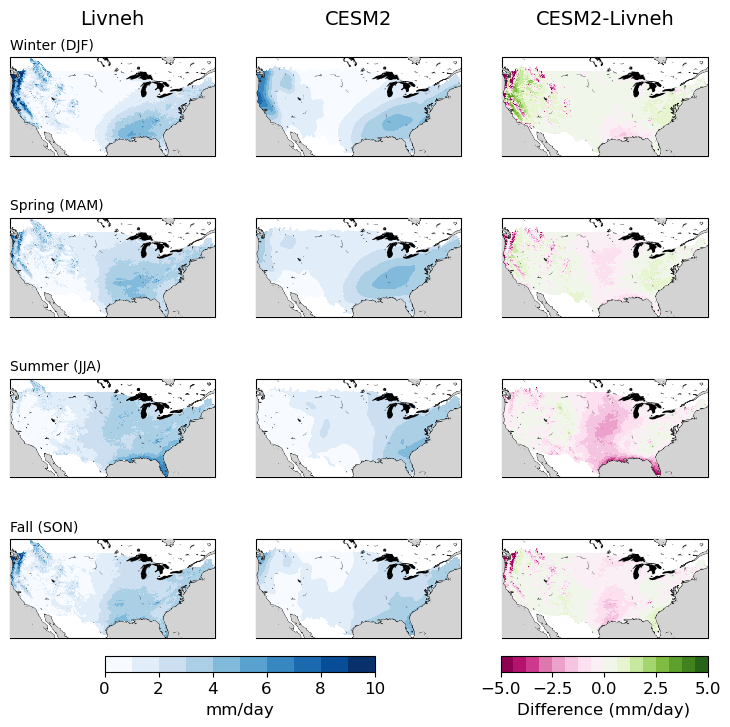

In [70]:
projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(9,8))

spec = gridspec.GridSpec(ncols=3, nrows=4, figure=fig)

# Add the subplots
ax1 = fig.add_subplot(spec[0,0], projection=projection)  #liv
ax2 = fig.add_subplot(spec[1,0],projection=projection) 
ax3 = fig.add_subplot(spec[2,0], projection=projection)  
ax4 = fig.add_subplot(spec[3,0], projection=projection)  
ax5 = fig.add_subplot(spec[0,1], projection=projection) #cesm
ax6 = fig.add_subplot(spec[1,1],projection=projection) 
ax7 = fig.add_subplot(spec[2,1], projection=projection)  
ax8 = fig.add_subplot(spec[3,1], projection=projection)  
ax9 = fig.add_subplot(spec[0,2], projection=projection) #diffs
ax10 = fig.add_subplot(spec[1,2],projection=projection) 
ax11 = fig.add_subplot(spec[2,2], projection=projection)  
ax12 = fig.add_subplot(spec[3,2], projection=projection)  


#--------- cartography
projection = ccrs.PlateCarree()

ax1.coastlines(linewidths=0.5)
ax1.add_feature(cfeature.OCEAN, facecolor="lightgray", zorder=10)
ax1.add_feature(cfeature.LAKES, facecolor='black', zorder=10)

ax2.coastlines(linewidths=0.5)
ax2.add_feature(cfeature.OCEAN, facecolor="lightgray", zorder=10)
ax2.add_feature(cfeature.LAKES, facecolor='black', zorder=10)

ax3.coastlines(linewidths=0.5)
ax3.add_feature(cfeature.OCEAN, facecolor="lightgray", zorder=10)
ax3.add_feature(cfeature.LAKES, facecolor='black', zorder=10)

ax3.coastlines(linewidths=0.5)
ax3.add_feature(cfeature.OCEAN, facecolor="lightgray", zorder=10)
ax3.add_feature(cfeature.LAKES, facecolor='black', zorder=10)

ax4.coastlines(linewidths=0.5)
ax4.add_feature(cfeature.OCEAN, facecolor="lightgray", zorder=10)
ax4.add_feature(cfeature.LAKES, facecolor='black', zorder=10)

ax5.coastlines(linewidths=0.5)
ax5.add_feature(cfeature.OCEAN, facecolor="lightgray", zorder=10)
ax5.add_feature(cfeature.LAKES, facecolor='black', zorder=10)

ax6.coastlines(linewidths=0.5)
ax6.add_feature(cfeature.OCEAN, facecolor="lightgray", zorder=10)
ax6.add_feature(cfeature.LAKES, facecolor='black', zorder=10)

ax7.coastlines(linewidths=0.5)
ax7.add_feature(cfeature.OCEAN, facecolor="lightgray", zorder=10)
ax7.add_feature(cfeature.LAKES, facecolor='black', zorder=10)

ax8.coastlines(linewidths=0.5)
ax8.add_feature(cfeature.OCEAN, facecolor="lightgray", zorder=10)
ax8.add_feature(cfeature.LAKES, facecolor='black', zorder=10)

ax9.coastlines(linewidths=0.5)
ax9.add_feature(cfeature.OCEAN, facecolor="lightgray", zorder=10)
ax9.add_feature(cfeature.LAKES, facecolor='black', zorder=10)

ax10.coastlines(linewidths=0.5)
ax10.add_feature(cfeature.OCEAN, facecolor="lightgray", zorder=10)
ax10.add_feature(cfeature.LAKES, facecolor='black', zorder=10)

ax11.coastlines(linewidths=0.5)
ax11.add_feature(cfeature.OCEAN, facecolor="lightgray", zorder=10)
ax11.add_feature(cfeature.LAKES, facecolor='black', zorder=10)

ax12.coastlines(linewidths=0.5)
ax12.add_feature(cfeature.OCEAN, facecolor="lightgray", zorder=10)
ax12.add_feature(cfeature.LAKES, facecolor='black', zorder=10)


#------------ colormaps 
cmap =  plt.get_cmap('Blues',10)
cmapd = plt.get_cmap('PiYG',16)

#------------ plots
p1 = prec_season_4d_l.sel(season=1).plot(ax=ax1, cmap=cmap, add_colorbar=False, vmin=0, vmax=10)
p2 = prec_season_4d_l.sel(season=2).plot(ax=ax2, cmap=cmap,  add_colorbar=False, vmin=0, vmax=10)
p3 = prec_season_4d_l.sel(season=3).plot(ax=ax3, cmap=cmap,  add_colorbar=False, vmin=0, vmax=10);
p4 = prec_season_4d_l.sel(season=4).plot(ax=ax4, cmap=cmap, add_colorbar=False, vmin=0, vmax=10);

p11 = prec_season_4d_c.sel(season=1).plot(ax=ax5, cmap=cmap, add_colorbar=False, vmin=0, vmax=10)
p21 = prec_season_4d_c.sel(season=2).plot(ax=ax6, cmap=cmap,  add_colorbar=False, vmin=0, vmax=10)
p31 = prec_season_4d_c .sel(season=3).plot(ax=ax7, cmap=cmap,  add_colorbar=False, vmin=0, vmax=10);
p41 = prec_season_4d_c.sel(season=4).plot(ax=ax8, cmap=cmap, add_colorbar=False, vmin=0, vmax=10);

p12 = prec_season_diff.sel(season=1).plot(ax=ax9, cmap=cmapd, add_colorbar=False, vmin=-5, vmax=5)
p22 = prec_season_diff.sel(season=2).plot(ax=ax10, cmap=cmapd,  add_colorbar=False, vmin=-5, vmax=5)
p32 = prec_season_diff.sel(season=3).plot(ax=ax11, cmap=cmapd,  add_colorbar=False, vmin=-5, vmax=5);
p42 = prec_season_diff.sel(season=4).plot(ax=ax12, cmap=cmapd, add_colorbar=False, vmin=-5, vmax=5);

#------------ titles
ax1.set_title("Livneh", fontsize=14, x=0.5, y=1.25)
ax5.set_title("CESM2", fontsize=14, x=0.5, y=1.25)
ax9.set_title("CESM2-Livneh", fontsize=14, x=0.5, y=1.25)
ax1.set_title('Winter (DJF)', fontsize=10, loc='left')
ax2.set_title('')
ax2.set_title("Spring (MAM)", fontsize=10,loc='left')
ax3.set_title('')
ax3.set_title("Summer (JJA)", fontsize=10,loc='left')
ax4.set_title('')
ax4.set_title("Fall (SON)", fontsize=10,loc='left')
ax6.set_title('')
ax7.set_title('')
ax8.set_title('')
ax10.set_title("", fontsize=12)
ax11.set_title('')
ax12.set_title('')

#----- legends

cax = fig.add_axes([0.23, 0.09, 0.3, 0.02])
cbar = fig.colorbar(p1,
                     orientation='horizontal', 
                     cax=cax,
)
cbar.set_label(label = 'mm/day', size=12)
cbar.ax.tick_params(labelsize=12)

cax = fig.add_axes([0.67, 0.09, 0.23, 0.02])
cbr = fig.colorbar(p12, orientation='horizontal',cax=cax)
cbr.set_label('Difference (mm/day)', size=12)
cbr.ax.tick_params(labelsize=12)


pltnm = dir_plot + 'FigureB_SeasonalPmean.png'
plt.savefig(pltnm, bbox_inches='tight')


plt.show();

## Figure 3

Import the data specific for this figure.

Average number of wet days per month (a, b) Variability in mean annual rainfall on wet days (c, d)

for Mid Atlantic (a, c) and Pacific Northwest (b, d).


In [71]:
dailyp = xr.open_dataset('Data/NWD_bymon_CESM2_HUC2_1981-2010.nc')
dailyfut = xr.open_dataset('Data/NWD_bymon_CESM2_HUC2_2040-2070.nc')
dailyl = xr.open_dataset('Data/NWD_bymon_Livneh_HUC2_1981-2010.nc')

In [72]:
sdii_c = ds_prec_cesm_huc2.SDII_a
sdii_l = ds_prec_liv_huc2.SDII_a

In [73]:
years = np.arange(1981,2011,1)
futyears = np.arange(2041,2071,1)

In [74]:
wy = [9,10,11,0,1,2,3,4,5,6,7,8] # order of months
wmons = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']

Do some calculations to find the maximum and minimum on each month to set up the envelope.

In [12]:
# MA wet days
ma_max_mon = dailyp.PRECT.sel(regname='MA').groupby('date.month').max().max('member')
ma_min_mon = dailyp.PRECT.sel(regname='MA').groupby('date.month').min().min('member')

ma_liv_max = dailyl.prec.sel(regname="MA").groupby('time.month').max()
ma_liv_min = dailyl.prec.sel(regname='MA').groupby('time.month').min()

# CA wet days
ca_max_mon = dailyp.PRECT.sel(regname='CA').groupby('date.month').max().max('member')
ca_min_mon = dailyp.PRECT.sel(regname='CA').groupby('date.month').min().min('member')

ca_liv_max = dailyl.prec.sel(regname="CA").groupby('time.month').max()
ca_liv_min = dailyl.prec.sel(regname='CA').groupby('time.month').min()

#PN wet day frequency
pn_max_mon = dailyp.PRECT.sel(regname='PN').groupby('date.month').max().max('member')
pn_min_mon = dailyp.PRECT.sel(regname='PN').groupby('date.month').min().min('member')

pn_liv_max = dailyl.prec.sel(regname="PN").groupby('time.month').max()
pn_liv_min = dailyl.prec.sel(regname='PN').groupby('time.month').min()

# Wet day volume by year
ma_max_ann = sdii_c.isel(region=17).max('member')
ma_min_ann = sdii_c.isel(region=17).min('member')

ca_max_ann = sdii_c.isel(region=2).max('member')
ca_min_ann = sdii_c.isel(region=2).min('member')

pn_max_ann = sdii_c.isel(region=9).max('member')
pn_min_ann = sdii_c.isel(region=9).min('member')


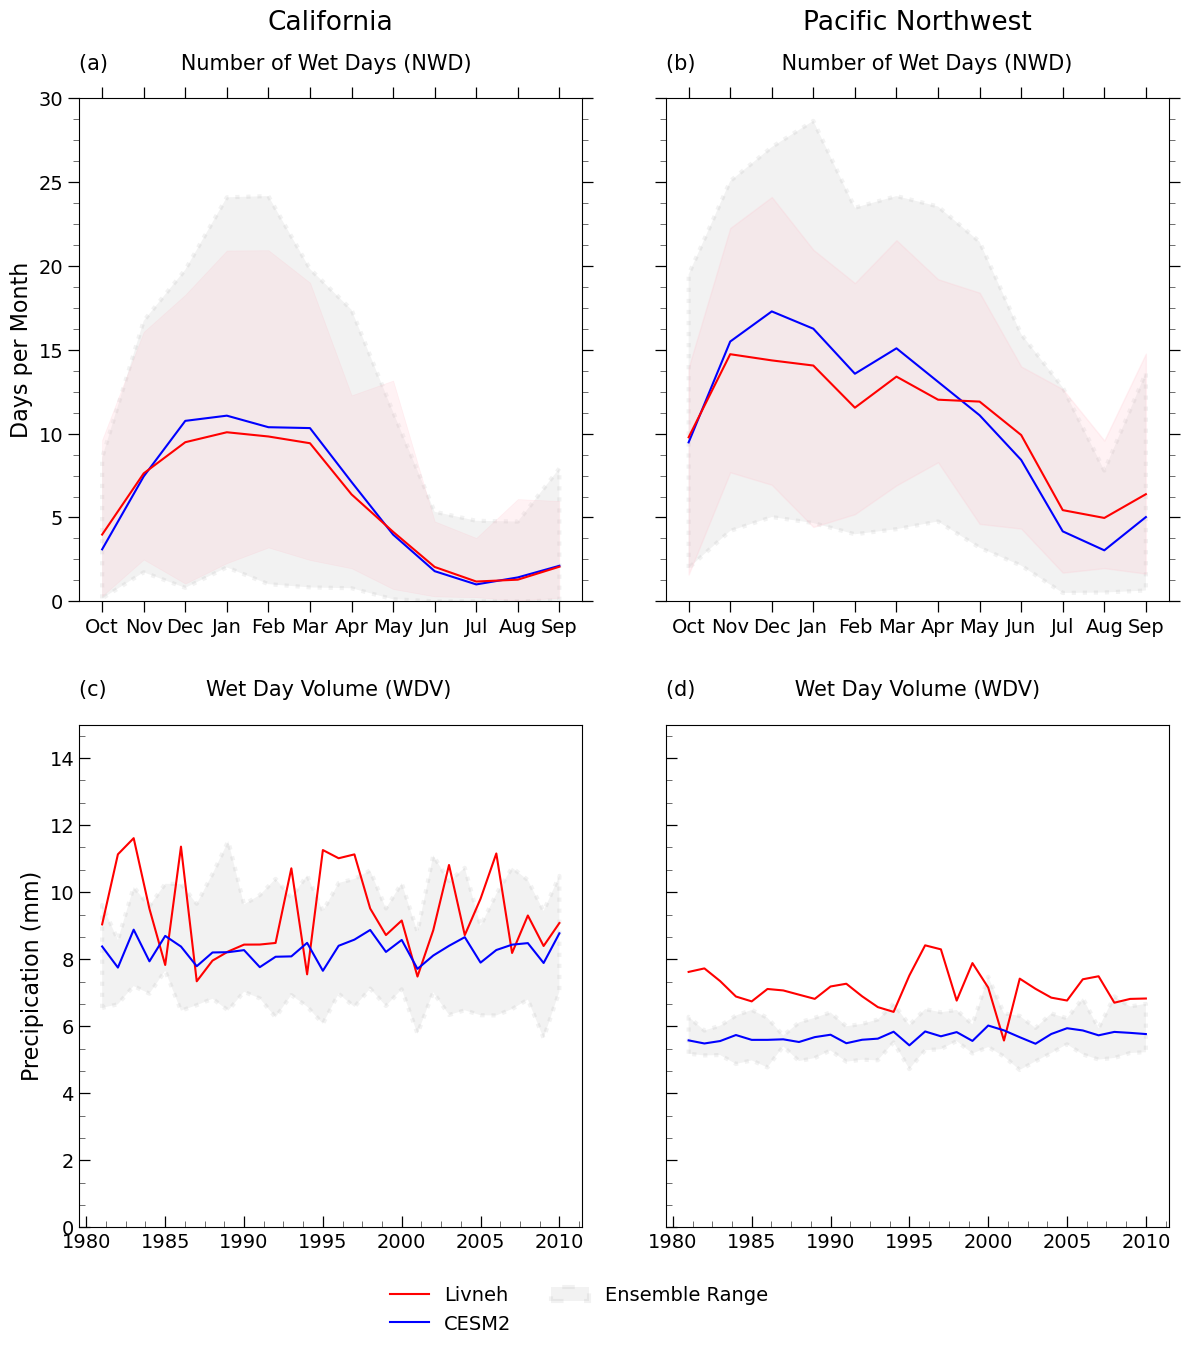

In [13]:
fig = plt.figure(figsize=(12, 12.5), constrained_layout=True)
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

# Set spacing between subplots, h/wsapce specified as a fraction of the size of the subplot group
fig.set_constrained_layout_pads(hspace=0.07, wspace=0.03)

# Add the subplots
ax1 = fig.add_subplot(spec[0, 0])  # upper left cell of grid
ax2 = fig.add_subplot(spec[0, 1])  # upper right cell of grid
ax3 = fig.add_subplot(spec[1, 0])  # lower left cell of grid
ax4 = fig.add_subplot(spec[1, 1])  # lower right cell of grid

# Make sure subplots are square
for axes in [ax1, ax2, ax3, ax4]:
    axes.set_box_aspect(1)

t=range(12)

# plot a: Mid Atlantic wet days
            
#foo = dailyp.PRECT.sel(date=slice('1980-10-01','2010-09-30')).groupby('date.month').mean(('member','date')).sel(regname='MA')
foo = dailyp.PRECT.sel(date=slice('1980-10-01','2010-09-30')).groupby('date.month').mean(('member','date')).sel(regname='CA')
ax1.plot(t,foo[wy],color='blue')

# Plot envelope from models
#ax1.fill_between(t,ma_max_mon[wy], ma_min_mon[wy], color='gray', alpha=0.1, linewidth=3, linestyle=':')
ax1.fill_between(t,ca_max_mon[wy], ca_min_mon[wy], color='gray', alpha=0.1, linewidth=3, linestyle=':')
  
#add in individual obs years
#l = dailyl.prec.sel(regname="MA").sel(time=slice('1980-10-01','2010-09-30')).groupby('time.month').mean('time')
l = dailyl.prec.sel(regname="CA").sel(time=slice('1980-10-01','2010-09-30')).groupby('time.month').mean('time')
ax1.plot(t,l[wy],color='red', zorder=10)
#ax1.fill_between(t, ma_liv_max[wy], ma_liv_min[wy], color='pink', alpha=0.2, linewidth=0.5)
ax1.fill_between(t, ca_liv_max[wy], ca_liv_min[wy], color='pink', alpha=0.2, linewidth=0.5)
ax1.set_ylim(0,25)
       # Use geocat.viz.util convenience function to add minor and major tick lines
gvutil.add_major_minor_ticks(ax1,
                                 x_minor_per_major=3,
                                 labelsize=14)
ax1.tick_params(direction='out', which='major', right=False, top=False, labelbottom=True)
                    
    # Use geocat.viz.util convenience function to set titles and labels
gvutil.set_titles_and_labels(ax1, ylabel='Days per Month', xlabel='',
                                lefttitle="(a)           Number of Wet Days (NWD)", lefttitlefontsize=15, 
                                maintitle="California", maintitlefontsize=17)
gvutil.set_axes_limits_and_ticks(ax1,
                             ylim=(0, 30),
                             xticks=t,
                             xticklabels=wmons,)
# Use geocat.viz.util convenience function to add minor and major tick lines
gvutil.add_major_minor_ticks(ax1,
                         x_minor_per_major=1,
                         y_minor_per_major=4,
                         labelsize=14)


# plot b: PAcific North WEstwet days
# Plot data
foo = dailyp.PRECT.sel(date=slice('1980-10-01','2010-09-30')).groupby('date.month').mean(('member','date')).sel(regname='PN')
ax2.plot(t,foo[wy],color='blue')

ax2.fill_between(t,pn_max_mon[wy], pn_min_mon[wy], color='gray', alpha=0.1, linestyle=':', linewidth=3)
  
#add in individual obs years
l = dailyl.prec.sel(regname="PN").sel(time=slice('1980-10-01','2010-09-30')).groupby('time.month').mean('time')
ax2.plot(t,l[wy],color='red', zorder=10)
ax2.fill_between(t, pn_liv_max[wy], pn_liv_min[wy], color='pink', alpha=0.2)
ax2.set_ylim(0,25)
       # Use geocat.viz.util convenience function to add minor and major tick lines
gvutil.add_major_minor_ticks(ax2,
                                 x_minor_per_major=3,
                                 labelsize=14)
ax2.tick_params(direction='out', which='major', right=False, top=False, labelbottom=True)
# Remove ticklabels on Y axis for panel 2 (ax2)
ax2.yaxis.set_ticklabels([])
                    
    # Use geocat.viz.util convenience function to set titles and labels
gvutil.set_titles_and_labels(ax2, ylabel='', xlabel='',
                                lefttitle="(b)             Number of Wet Days (NWD)", lefttitlefontsize=15,
                                maintitle="Pacific Northwest", maintitlefontsize=17)
gvutil.set_axes_limits_and_ticks(ax2,
                             ylim=(0, 30),
                             xticks=t,
                             xticklabels=wmons,)
# Use geocat.viz.util convenience function to add minor and major tick lines
gvutil.add_major_minor_ticks(ax2,
                         x_minor_per_major=1,
                         y_minor_per_major=4,
                         labelsize=14)


# Plot c interannual variability in SDII
#ls = sdii_l.isel(region=17)
ls = sdii_l.isel(region=2)
ax3.plot(years,ls, color='red')
#cs = sdii_c.isel(region=17).mean('member')
cs = sdii_c.isel(region=2).mean('member')
ax3.plot(years, cs, color='blue', zorder=2)
#ax3.fill_between(years, ma_max_ann, ma_min_ann, color='grey', linestyle=':', alpha=0.1, linewidth=3)
ax3.fill_between(years, ca_max_ann, ca_min_ann, color='grey', linestyle=':', alpha=0.1, linewidth=3)
ax3.set_ylim(0,15)
       # Use geocat.viz.util convenience function to add minor and major tick lines
gvutil.add_major_minor_ticks(ax3,
                             x_minor_per_major=4,
                             labelsize=14)
ax3.tick_params(direction='in', which='both', right=False, top=False, labelbottom=True)
                        
                    
    # Use geocat.viz.util convenience function to set titles and labels
gvutil.set_titles_and_labels(ax3, ylabel='Precipication (mm)', xlabel='',
                            lefttitle="(c)               Wet Day Volume (WDV)", lefttitlefontsize=15,
)

# Plot d interannual variability in SDII
ls = sdii_l.isel(region=9)
ax4.plot(years,ls, color='red', label="Livneh")
cs = sdii_c.isel(region=9).mean('member')
ax4.plot(years, cs, color='blue', zorder=2, label="CESM2")
ax4.fill_between(years, pn_max_ann, pn_min_ann, color='grey', linestyle=':', alpha=0.1, linewidth=3, label='Ensemble Range')
ax4.set_ylim(0,15)
       # Use geocat.viz.util convenience function to add minor and major tick lines
gvutil.add_major_minor_ticks(ax4,
                             x_minor_per_major=4,
                             labelsize=14)
ax4.tick_params(direction='in', which='both', right=False, top=False, labelbottom=True)
ax4.yaxis.set_ticklabels([])
                        
                    
    # Use geocat.viz.util convenience function to set titles and labels
gvutil.set_titles_and_labels(ax4, ylabel='', xlabel='',
                            lefttitle="(d)               Wet Day Volume (WDV)", lefttitlefontsize=15,
                           )

# add a legend
fig.legend(loc='upper right', frameon=False, fontsize=14, ncols=2, )

plt.savefig(dir_plot + 'Figure3_NWD_WDV_shaded_CA.png')
plt.show()

## Figure 4
Box plots of CDD and CWD

In [14]:
cesmcdd = ds_prec_cesm_huc2.CDD.stack(z=('year', 'member'))
cesmcwd = ds_prec_cesm_huc2.CWD.stack(z=('year', 'member'))
livcdd = ds_prec_liv_huc2.CDD
livcwd = ds_prec_liv_huc2.CWD

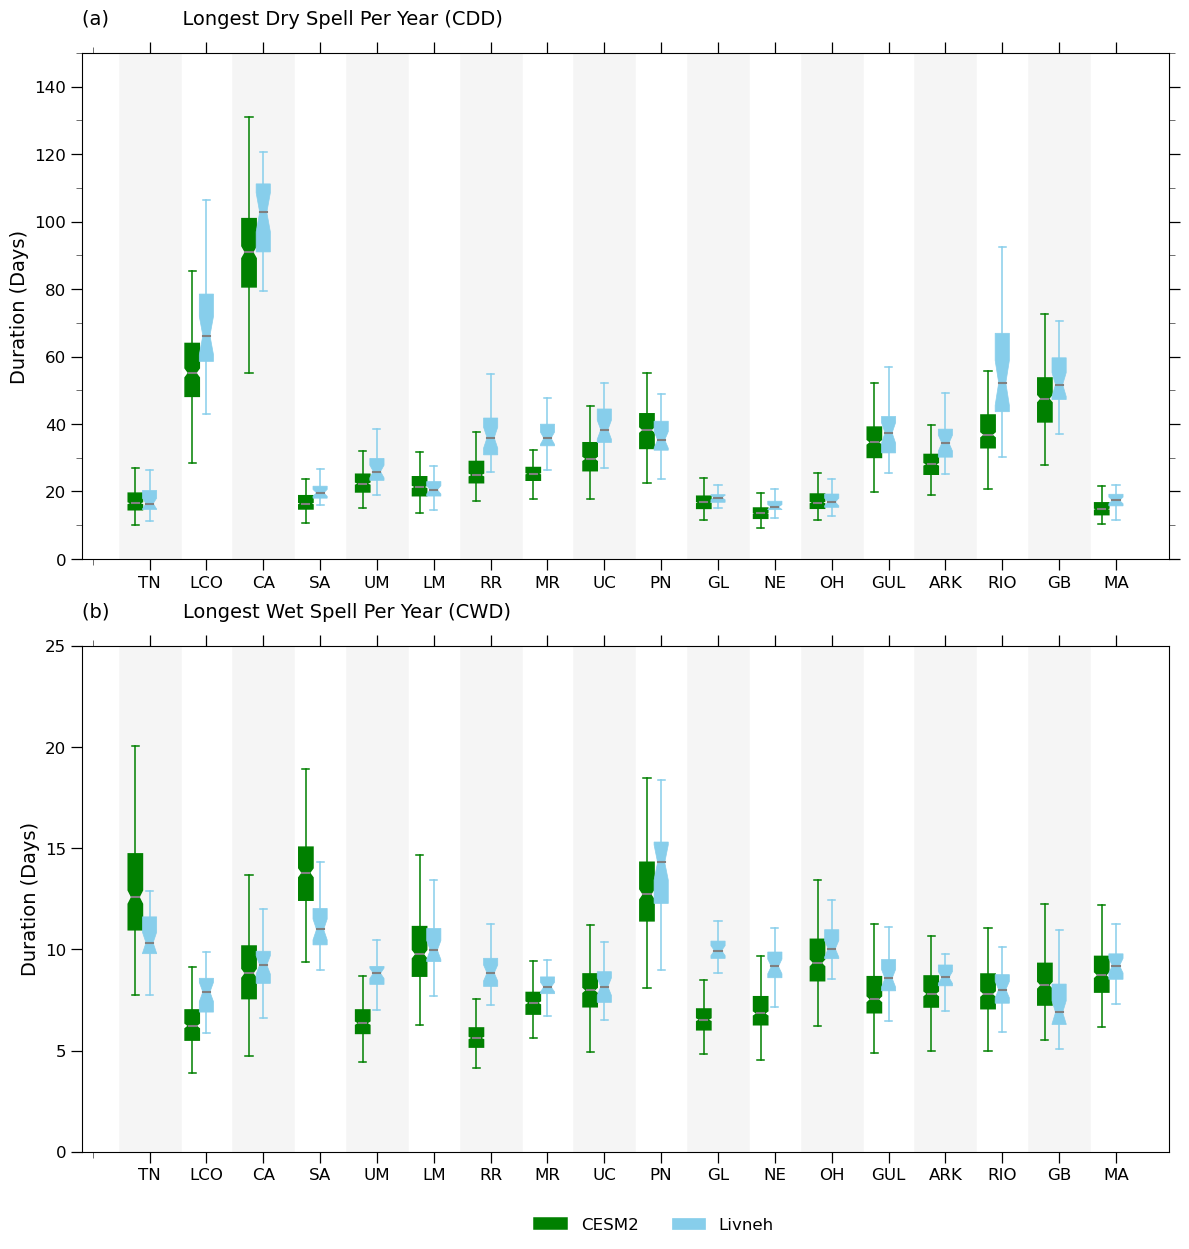

In [15]:
fig = plt.figure(figsize=(12,12.5), layout='constrained') 

spec = gridspec.GridSpec(ncols=1, nrows=2, figure=fig)

fig.tight_layout(pad=50)

ax1 = fig.add_subplot(spec[0])  # top
ax2 = fig.add_subplot(spec[1])

#main = 'Comparison of variability in CDD'
    # Using a dictionary makes it easy to reuse the same keyword arguments twice for the contours
kwargs = dict(
        widths=0.25,  # box width
        showfliers=False, # extreme extents
        patch_artist=True, # colour boxes
        showmeans = False,
        notch=True,
        medianprops={"color": "gray", "linewidth": 1.5},
)

    # transform data throughout to have regions then data
posc = np.arange(cesmcdd.shape[0]) - 0.25
posl = np.arange(livcdd.shape[1])

xposition = np.arange(0,18,2)
for xc in xposition:
        ax1.axvline(x=xc, color='whitesmoke', linestyle='-', linewidth=45)
        ax2.axvline(x=xc, color='whitesmoke', linestyle='-', linewidth=45)

## CDD
bp1 = ax1.boxplot(cesmcdd.T,
                         positions=posc,
                         manage_ticks=False,
                              boxprops={"facecolor": "green", "edgecolor": "green",
                                  "linewidth": 1.1},
                             whiskerprops={"color": "green", "linewidth": 1.1},
                            capprops={"color": "green", "linewidth": 1.1}, 
                           **kwargs,
                           )

bp2 = ax1.boxplot(livcdd,
                         positions=posl,
                         boxprops={"facecolor": "skyblue", "edgecolor": "skyblue",
                                  "linewidth": 0.5},
                                whiskerprops={"color": "skyblue", "linewidth": 1.1},
                                capprops={"color": "skyblue", "linewidth": 1.1},
                        manage_ticks=False,
                           **kwargs,
                           )


## CWD
bp1 = ax2.boxplot(cesmcwd.T,
                         positions=posc,
                         manage_ticks=False,
                              boxprops={"facecolor": "green", "edgecolor": "green",
                                  "linewidth": 1.1},
                             whiskerprops={"color": "green", "linewidth": 1.1},
                            capprops={"color": "green", "linewidth": 1.1}, 
                           **kwargs,
                           )

bp2 = ax2.boxplot(livcwd,
                         positions=posl,
                         boxprops={"facecolor": "skyblue", "edgecolor": "skyblue",
                                  "linewidth": 0.5},
                                whiskerprops={"color": "skyblue", "linewidth": 1.1},
                                capprops={"color": "skyblue", "linewidth": 1.1},
                        manage_ticks=False,
                           **kwargs,
                           )

        # format axes
ax1.yaxis.set_ticks_position('left')
gvutil.add_major_minor_ticks(ax1,
                                     y_minor_per_major=2,
                                     labelsize=12,
                             x_minor_per_major=1,)

gvutil.add_major_minor_ticks(ax2,
                                     y_minor_per_major=1,
                                     labelsize=12,
                             x_minor_per_major=1,
                                    )
ax2.yaxis.set_ticks_position('left')



        # Use geocat.viz.util convenience function to add title to the plot axis.
gvutil.set_titles_and_labels(ax1,
#                                     maintitle= "Longest Dry Spell Per Year (CDD)",
#                                     maintitlefontsize=12,
                             lefttitle = "(a)            Longest Dry Spell Per Year (CDD)", lefttitlefontsize=14,
                             ylabel='Duration (Days)',
                             labelfontsize=14
                            )
gvutil.set_titles_and_labels(ax2,
#                                     maintitle= "Longest Wet Spell Per Year (CWD)",
#                                     maintitlefontsize=12,
                             lefttitle='(b)            Longest Wet Spell Per Year (CWD)', lefttitlefontsize=14,
                             ylabel='Duration (Days)',
                             labelfontsize=14
                            )

gvutil.set_axes_limits_and_ticks(ax = ax1,xticklabels=hucref,xticks=range(18), ylim=(0,150))
gvutil.set_axes_limits_and_ticks(ax = ax2,xticklabels=hucref,xticks=range(18), ylim=(0,25))

ax2.legend([bp1["boxes"][0], bp2["boxes"][0]],  ["CESM2", "Livneh",], fontsize=12, bbox_to_anchor=(0.65,-.1), ncols=2, frameon=False)



        # Display Plot
plt.tight_layout()
plt.savefig('Figure4_CDD_CWD.png')
plt.show()


## Figure 5
Time series of N95 and P95Tot for Tennessee, Great Lakes, California and Souris-Red Rainy, for (left) observations derived from Livneh 1981-2010 and (right) CESM2.

In [16]:
n95_cesm = xr.open_dataset('Data/N95_CESM2_001-010_HUC2_1981-2010.nc')
n95_liv = xr.open_dataset('Data/N95_Livneh_HUC2_1981-2010.nc')
n95_fut = xr.open_dataset('Data/N95_CESM2_001-010_HUC2_2040-2070.nc')

p95_cesm = xr.open_dataset('Data/P95Tot_CESM2_001-010_HUC2_1981-2010.nc')
p95_liv = xr.open_dataset('Data/P95Tot_Livneh_HUC2_1981-2010.nc')
p95_fut = xr.open_dataset('Data/P95Tot_CESM2_001-010_HUC2_2040-2070.nc')

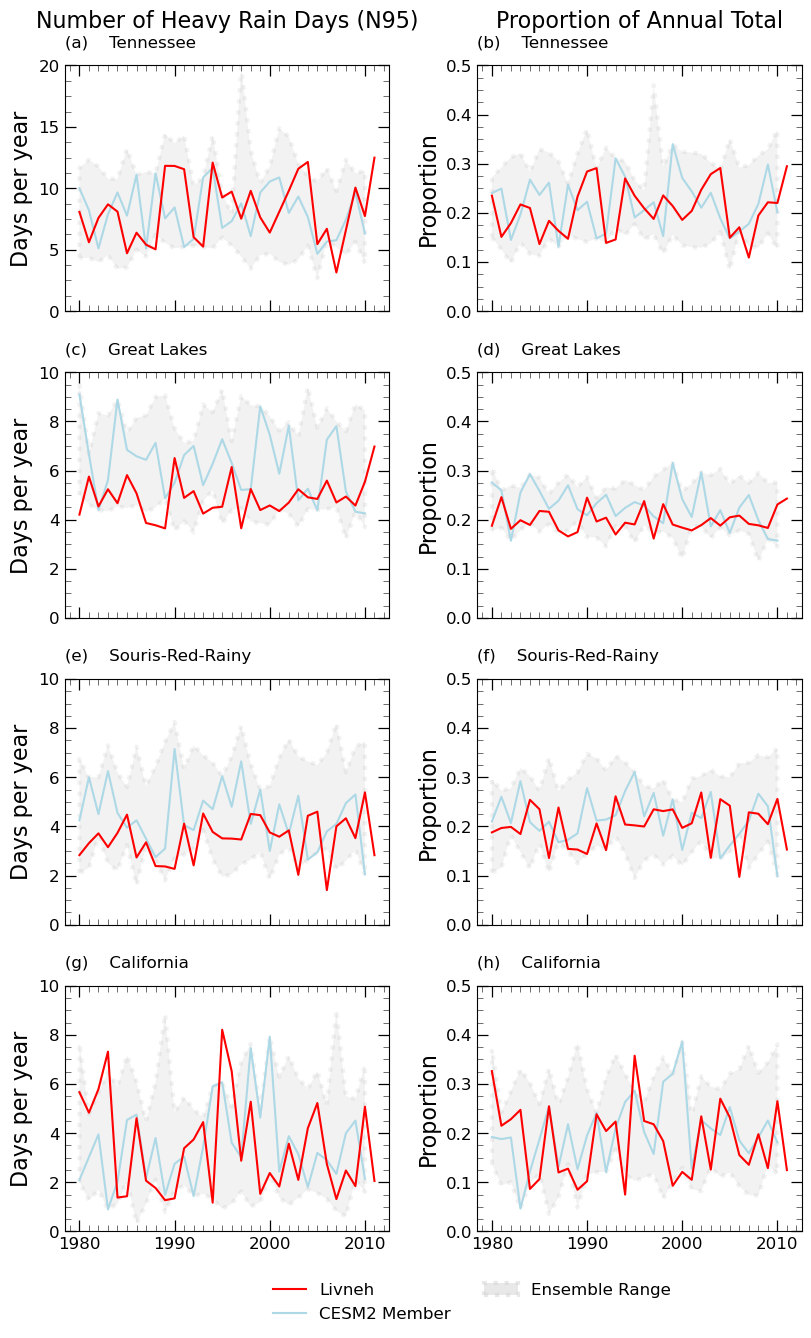

In [17]:
fig = plt.figure(figsize=(8, 12.5), constrained_layout=True)
spec = gridspec.GridSpec(ncols=2, nrows=4, figure=fig)

# Set spacing between subplots, h/wsapce specified as a fraction of the size of the subplot group
fig.set_constrained_layout_pads(hspace=0.07, wspace=0.07)

# Add the subplots left col N95, right col P95t
ax1 = fig.add_subplot(spec[0, 0])  # upper left cell of grid
ax5 = fig.add_subplot(spec[0, 1])  # upper right cell of grid
ax2 = fig.add_subplot(spec[1, 0])  # row2 left cell of grid
ax6 = fig.add_subplot(spec[1, 1])  # row2 right cell of grid
ax3 = fig.add_subplot(spec[2, 0])  # row3 left cell of grid
ax7 = fig.add_subplot(spec[2, 1])  # row3 right cell of grid
ax4 = fig.add_subplot(spec[3, 0])  # lower left cell of grid
ax8 = fig.add_subplot(spec[3, 1])  # lower right cell of grid

case = np.random.randint(10)
# Plot all N95 per year
n= n95_cesm.N95.sel(regname="TN").isel(member=case)
ax1.plot(n95_cesm.year, n, color='lightblue')
ax1.plot(n95_liv.year, n95_liv.N95.sel(regname="TN"), color='red', zorder=10)
ax1.fill_between(n95_cesm.year, n95_cesm.N95.sel(regname='TN').max('member'), n95_cesm.N95.sel(regname='TN').min('member'), alpha=0.1, color='grey', linestyle=":", linewidth=3)
ax1.set_ylim(0,20)
ax1.xaxis.set_ticklabels([])


n= n95_cesm.N95.sel(regname="GL").isel(member=case)
ax2.plot(n95_cesm.year, n, color='lightblue')
ax2.plot(n95_liv.year, n95_liv.N95.sel(regname="GL"), color='red', zorder=10)
ax2.fill_between(n95_cesm.year, n95_cesm.N95.sel(regname='GL').max('member'), n95_cesm.N95.sel(regname='GL').min('member'), alpha=0.1, color='grey', linestyle=":", linewidth=3)
ax2.set_ylim(0,10)
ax2.xaxis.set_ticklabels([])

n= n95_cesm.N95.sel(regname="RR").isel(member=case)
ax3.plot(n95_cesm.year, n, color='lightblue')
ax3.plot(n95_liv.year, n95_liv.N95.sel(regname="RR"), color='red', zorder=10)
ax3.fill_between(n95_cesm.year, n95_cesm.N95.sel(regname='RR').max('member'), n95_cesm.N95.sel(regname='RR').min('member'), alpha=0.1, color='grey', linestyle=":", linewidth=3)
ax3.set_ylim(0,10)
ax3.xaxis.set_ticklabels([])


n= n95_cesm.N95.sel(regname="CA").isel(member=case)
ax4.plot(n95_cesm.year, n, color='lightblue')
ax4.plot(n95_liv.year, n95_liv.N95.sel(regname="CA"), color='red', zorder=10)
ax4.fill_between(n95_cesm.year, n95_cesm.N95.sel(regname='CA').max('member'), n95_cesm.N95.sel(regname='CA').min('member'), alpha=0.1, color='grey', linestyle=":", linewidth=3)
ax4.set_ylim(0,10)


### Proportional Contribution of Heavy Days
n= p95_cesm.P95Tot.sel(regname="TN").isel(member=case)
ax5.plot(p95_cesm.year, n, color='lightblue')
ax5.plot(p95_liv.year, p95_liv.P95Tot.sel(regname="TN"), color='red', zorder=10)
ax5.fill_between(p95_cesm.year, p95_cesm.P95Tot.sel(regname='TN').max('member'), p95_cesm.P95Tot.sel(regname='TN').min('member'), alpha=0.1, color='grey', linestyle=":", linewidth=3, label='Ensemble Range')
ax5.set_ylim(0,0.5)
ax5.xaxis.set_ticklabels([])


n= p95_cesm.P95Tot.sel(regname="GL").isel(member=case)
ax6.plot(p95_cesm.year, n, color='lightblue')
ax6.plot(p95_liv.year, p95_liv.P95Tot.sel(regname="GL"), color='red', zorder=10)
ax6.fill_between(p95_cesm.year, p95_cesm.P95Tot.sel(regname='GL').max('member'), p95_cesm.P95Tot.sel(regname='GL').min('member'), alpha=0.1, color='grey', linestyle=":", linewidth=3, label='Ensemble Range')
ax6.set_ylim(0,0.5)
ax6.xaxis.set_ticklabels([])

n= p95_cesm.P95Tot.sel(regname="RR").isel(member=case)
ax7.plot(p95_cesm.year, n, color='lightblue')
ax7.plot(p95_liv.year, p95_liv.P95Tot.sel(regname="RR"), color='red', zorder=10)
ax7.fill_between(p95_cesm.year, p95_cesm.P95Tot.sel(regname='RR').max('member'), p95_cesm.P95Tot.sel(regname='RR').min('member'), alpha=0.1, color='grey', linestyle=":", linewidth=3, label='Ensemble Range')
ax7.set_ylim(0,0.5)
ax7.xaxis.set_ticklabels([])


n= p95_cesm.P95Tot.sel(regname="CA").isel(member=case)
ax8.plot(p95_cesm.year, n, color='lightblue')
ax8.plot(p95_liv.year, p95_liv.P95Tot.sel(regname="CA"), color='red', zorder=10, label="Livneh")
ax8.fill_between(p95_cesm.year, p95_cesm.P95Tot.sel(regname='CA').max('member'), p95_cesm.P95Tot.sel(regname='CA').min('member'), alpha=0.1, color='grey', linestyle=":", linewidth=3, label='Ensemble Range')
ax8.set_ylim(0,0.5)




# Use geocat.viz.util convenience function to add minor and major tick lines
ax1.tick_params(direction='in', which='both', right=False, top=False, labelbottom=True)
ax2.tick_params(direction='in', which='both', right=False, top=False, labelbottom=True)
ax3.tick_params(direction='in', which='both', right=False, top=False, labelbottom=True)
ax4.tick_params(direction='in', which='both', right=False, top=False, labelbottom=True)
ax5.tick_params(direction='in', which='both', right=False, top=False, labelbottom=True)
ax6.tick_params(direction='in', which='both', right=False, top=False, labelbottom=True)
ax7.tick_params(direction='in', which='both', right=False, top=False, labelbottom=True)
ax8.tick_params(direction='in', which='both', right=False, top=False, labelbottom=True)
                        

# Use geocat.viz.util convenience function to add minor and major tick lines
gvutil.add_major_minor_ticks(ax1,
                         x_minor_per_major=10,
                         y_minor_per_major=4,
                         labelsize=12)
gvutil.add_major_minor_ticks(ax2,
                         x_minor_per_major=10,
                         y_minor_per_major=4,
                         labelsize=12)
gvutil.add_major_minor_ticks(ax3,
                         x_minor_per_major=10,
                         y_minor_per_major=4,
                         labelsize=12)
gvutil.add_major_minor_ticks(ax4,
                         x_minor_per_major=10,
                         y_minor_per_major=4,
                         labelsize=12)
gvutil.add_major_minor_ticks(ax5,
                         x_minor_per_major=10,
                         y_minor_per_major=4,
                         labelsize=12)
gvutil.add_major_minor_ticks(ax6,
                         x_minor_per_major=10,
                         y_minor_per_major=4,
                         labelsize=12)
gvutil.add_major_minor_ticks(ax7,
                         x_minor_per_major=10,
                         y_minor_per_major=4,
                         labelsize=12)
gvutil.add_major_minor_ticks(ax8,
                         x_minor_per_major=10,
                         y_minor_per_major=4,
                         labelsize=12)

# Use geocat.viz.util convenience function to set titles and labels
gvutil.set_titles_and_labels(ax1, ylabel='Days per year', xlabel='',
                            maintitle="Number of Heavy Rain Days (N95)", maintitlefontsize=14,
                            lefttitle="(a)    Tennessee", lefttitlefontsize=12,
                            )
gvutil.set_titles_and_labels(ax2, ylabel='Days per year', xlabel='',
#                            maintitle="Great Lakes", maintitlefontsize=12,
                            lefttitle="(c)    Great Lakes", lefttitlefontsize=12,
                            )
gvutil.set_titles_and_labels(ax3, ylabel='Days per year', xlabel='',
#                            maintitle="Souris-Red-Rainy", maintitlefontsize=12,
                            lefttitle="(e)    Souris-Red-Rainy", lefttitlefontsize=12,
                            )
gvutil.set_titles_and_labels(ax4, ylabel='Days per year', xlabel='',
#                            maintitle="California", maintitlefontsize=12,
                            lefttitle="(g)    California", lefttitlefontsize=12,
                            )

# Use geocat.viz.util convenience function to set titles and labels
gvutil.set_titles_and_labels(ax5, ylabel='Proportion', xlabel='',
                            maintitle="Proportion of Annual Total", maintitlefontsize=14,
                            lefttitle="(b)    Tennessee", lefttitlefontsize=12,
                            )
gvutil.set_titles_and_labels(ax6, ylabel='Proportion', xlabel='',
#                            maintitle="Great Lakes", maintitlefontsize=12,
                            lefttitle="(d)    Great Lakes", lefttitlefontsize=12,
                            )
gvutil.set_titles_and_labels(ax7, ylabel='Proportion', xlabel='',
#                            maintitle="Souris-Red-Rainy", maintitlefontsize=12,
                            lefttitle="(f)    Souris-Red-Rainy", lefttitlefontsize=12,
                            )
gvutil.set_titles_and_labels(ax8, ylabel='Proportion', xlabel='',
#                            maintitle="California", maintitlefontsize=12,
                            lefttitle="(h)    California", lefttitlefontsize=12,
                            )
blue_line = Line2D([0], [0], color='lightblue', label='CESM2 Member')
red_line = Line2D([0], [0], color='red', label='Livneh')
grey_patch = patches.Patch(color = 'lightgrey', alpha = 0.5, linestyle = ':', linewidth=3, label='Ensemble Range')
# add a legend
fig.legend(handles=[red_line, blue_line, grey_patch],frameon=False, fontsize=12, bbox_to_anchor=(0.85,-.01), ncols=2)


plt.savefig(dir_plot + 'Figure5_N95_P95t_shaded.png')
plt.show()


### Appendix C
Maximum daily runoff from Ming's figures

In [75]:
flnm_mean_liv_nat = 'runoff_mean_1981-2005_livneh.nc'
flnm_mean_liv = 'runoff_mean_1981-2005_2cesmGrid.nc'
flnm_mean_cesm = "runoff_mean_1981-2005_CESM.nc"

In [76]:
with xr.open_dataset(dir_cesm + flnm_mean_cesm ) as ds_mean_cesm:
  print(dir_cesm + flnm_mean_cesm)

with xr.open_dataset(dir_liv + flnm_mean_liv) as ds_mean_liv:
  print(dir_liv + flnm_mean_liv)  


/glade/campaign/mmm/c3we/mingge/CESM/RUNOFF/runoff_mean_1981-2005_CESM.nc
/glade/campaign/mmm/c3we/mingge/LIVNEH/runoff_mean_1981-2005_2cesmGrid.nc


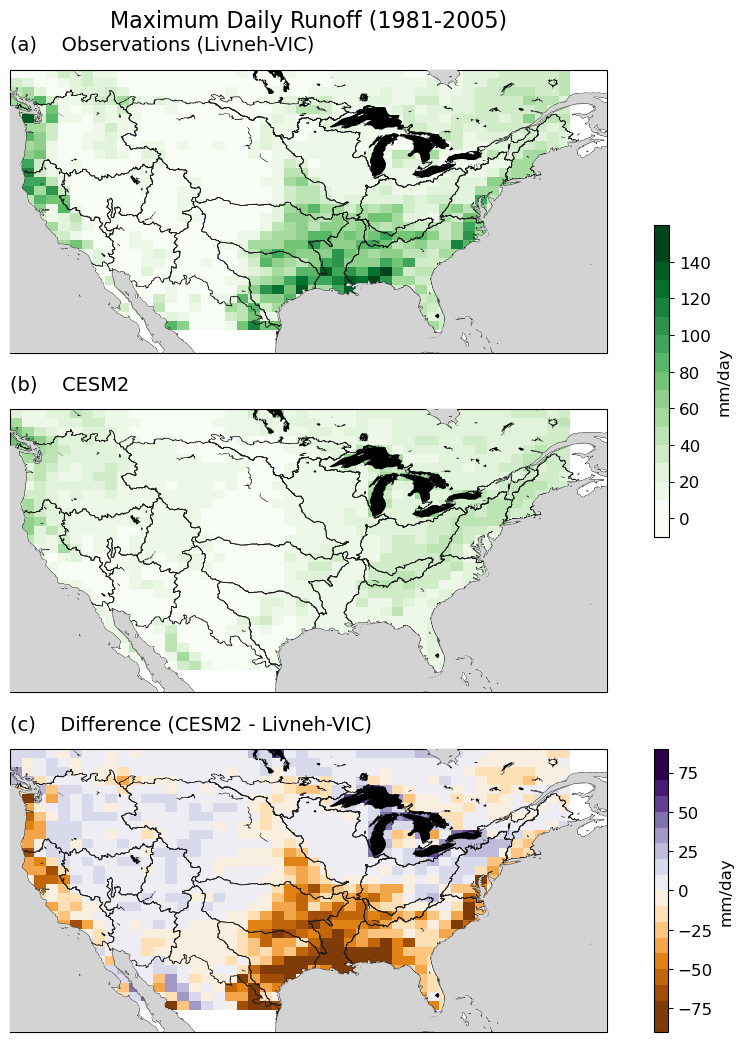

In [25]:
runoff_liv  = ds_mean_liv.runoff_max
runoff_cesm = ds_mean_cesm.runoff_max_wy_3d.mean(dim=('member'))
runoff_dif  = runoff_cesm - runoff_liv

projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(12,12.5)) 

spec = gridspec.GridSpec(ncols=1, nrows=3, figure=fig)

# Set spacing between subplots, h/wsapce specified as a fraction of the size of the subplot group
#fig.set_constrained_layout_pads(hspace=0.07, wspace=0.07)

# Add the subplots left col N95, right col P95t
ax1 = fig.add_subplot(spec[0], projection=projection)  # top
ax2 = fig.add_subplot(spec[1],projection=projection)  # middle
ax3 = fig.add_subplot(spec[2], projection=projection)  # lower

#--------- cartography
projection = ccrs.PlateCarree()
#ax1.subplot(projection=projection)
ax1.coastlines(linewidths=0.5)
ax1.add_feature(cfeature.OCEAN, facecolor="lightgray", zorder=10)
ax1.add_feature(cfeature.LAKES, facecolor='black', zorder=10)

#ax2.subplot(projection=projection)
ax2.coastlines(linewidths=0.5)
ax2.add_feature(cfeature.OCEAN, facecolor="lightgray", zorder=10)
ax2.add_feature(cfeature.LAKES, facecolor='black', zorder=10)

#ax3 = plt.subplot(1, 3, 3, projection=projection)
ax3.coastlines(linewidths=0.5)
ax3.add_feature(cfeature.OCEAN, facecolor="lightgray", zorder=10)
ax3.add_feature(cfeature.LAKES, facecolor='black', zorder=10)


#------------ colormaps 
cmap =  plt.get_cmap('Greens',15)
cmapd = plt.get_cmap('PuOr',16)

#------------ plots
p1 = runoff_liv.plot(ax=ax1, cmap=cmap, add_colorbar=False, vmin=0, vmax=150)
p2 = runoff_cesm.plot(ax=ax2, cmap=cmap, robust=True, add_colorbar=False, vmin=0, vmax=150)
p3 = runoff_dif.plot(ax=ax3, cmap=cmapd, robust=True, add_colorbar=False, vmin=-80, vmax=80);

#---- add huc regions
huc2_regions.plot(ax=ax1, add_label=False, line_kws=dict(linewidth=0.5))
huc2_regions.plot(ax=ax2, add_label=False, line_kws=dict(linewidth=0.5))
huc2_regions.plot(ax=ax3, add_label=False, line_kws=dict(linewidth=0.5))
#------------ titles
# Use geocat.viz.util convenience function to set titles and labels
gvutil.set_titles_and_labels(ax1, 
                            maintitle="Maximum Daily Runoff (1981-2005)", maintitlefontsize=14,
                            lefttitle="(a)    Observations (Livneh-VIC)", lefttitlefontsize=14,
                            )
gvutil.set_titles_and_labels(ax2, 
                            lefttitle="(b)    CESM2", lefttitlefontsize=14,
                            )
gvutil.set_titles_and_labels(ax3, 
                            lefttitle="(c)    Difference (CESM2 - Livneh-VIC)", lefttitlefontsize=14,
                            )


#----- legends

cbar_ = plt.colorbar(p1,ax=[ax1,ax2], orientation='vertical',  extend='both', extendrect=True,
                     extendfrac='auto',
                     shrink=0.5,
                     aspect=20,
)
cbar_.set_label(label = 'mm/day',size=12)
#cbar_.set_ticks([0,2,4,6,8,10])
cbar_.ax.tick_params(labelsize=12)



cbar_ = plt.colorbar(p3,ax=ax3, orientation='vertical',  extend='both', extendrect=True,
                     extendfrac='auto',
                     aspect=20,
                    )
cbar_.set_label(label = 'mm/day', size=12)
cbar_.ax.tick_params(labelsize=12)


pltnm = dir_plot + 'FigureC_QMax.png'
plt.savefig(pltnm, bbox_inches='tight')
plt.show();

## Figure 6

Runoff figures.
Figure S2 is a comparison of mapped grid cells. from Ming's plots.
Comparison of interannual variability in Souris Red Rainy stream flow

Using Q7 daily

In [77]:
q7cesm = xr.open_dataset('Data/Q7daily_CESM2_001-010_HUC2_1980-2005.nc')
q7liv = xr.open_dataset('Data/Q7daily_Livneh_HUC2_1980-2005.nc')

Select just the souris red rainy region

In [78]:
q7c_rr = q7cesm.sel(region=6).rename_vars({'runoff_avg7':'Q7'}).drop_vars('region')
q7l_rr = q7liv.sel(region=6).rename_vars({'runoff_avg7_cesm':'Q7'}).drop_vars('region')

Climatological values of max, mean and min per day of the year across all years and all ensemble members. Rearranged to water year order

In [79]:
monthnm = ("Oct","Nov","Dec","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep")
montix = np.arange(0,365,31)
years = np.arange(1980,2006,1)
daytix = np.concatenate([np.arange(270,366,1), np.arange(270)])

In [80]:
mean_bydowy_c = q7c_rr.Q7.sel(date=slice('1980-10-01','2005-09-30')).groupby('date.dayofyear').mean(('member', 'date'))[daytix]
max_bydowy_c = q7c_rr.Q7.sel(date=slice('1980-10-01','2005-09-30')).groupby('date.dayofyear').max(('member', 'date'))[daytix]
min_bydowy_c = q7c_rr.Q7.sel(date=slice('1980-10-01','2005-09-30')).groupby('date.dayofyear').min(('member', 'date'))[daytix]

In [30]:
mean_bydowy_l = q7l_rr.Q7.sel(Time=slice('1980-10-01','2005-09-30')).groupby('Time.dayofyear').mean()[daytix]
max_bydowy_l = q7l_rr.Q7.sel(Time=slice('1980-10-01','2005-09-30')).groupby('Time.dayofyear').max()[daytix]
min_bydowy_l = q7l_rr.Q7.sel(Time=slice('1980-10-01','2005-09-30')).groupby('Time.dayofyear').min()[daytix]

Cumulative sum of runoff per day of year 

In [31]:
cuml_mx_wy_c = np.cumsum(max_bydowy_c.drop_vars('dayofyear'))
cuml_wy_c = np.cumsum(mean_bydowy_c).drop_vars('dayofyear')
cuml_mn_wy_c = np.cumsum(min_bydowy_c.drop_vars('dayofyear'))

In [32]:
cuml_mx_wy_l = np.cumsum(max_bydowy_l.drop_vars('dayofyear'))
cuml_wy_l = np.cumsum(mean_bydowy_l).drop_vars('dayofyear')
cuml_mn_wy_l = np.cumsum(min_bydowy_l.drop_vars('dayofyear'))

Convert all of these to acre feet!

Model output is in mm/day. Values are the sum over the catchment area - so this is a depth of xx millimetres over the whole area. 

Area of souris red rainy from the shape file is in km2. 1km2 = 1,000,000 m2
mm = 0.001 m

1 acrefoot = 1,233m3

Runoff volume per day = Q7 x 0.001 x area_srr x 1000000 / 1233

Showing daily values so don't need to convert time unit.
Plot in millions of acrefeet?

In [81]:
wm_tx = [0,30,59,90,121,149,180,210,241,272,303,334]

In [34]:
# conversion
areasqkm = shp_gpd['AreaSqKm'] # all areas
rr_areasqm = areasqkm[6]*1e+6 # area of souris red rainy in m2


mean_dowy_acrft_c = (mean_bydowy_c.drop_vars('dayofyear')/1000)*rr_areasqm/1233
max_dowy_acrft_c = (max_bydowy_c.drop_vars('dayofyear')/1000)*rr_areasqm/1233
min_dowy_acrft_c = (min_bydowy_c.drop_vars('dayofyear')/1000)*rr_areasqm/1233

cuml_acrft_c = (cuml_wy_c/1000)*rr_areasqm/1233
cuml_mx_acrft_c = (cuml_mx_wy_c/1000)*rr_areasqm/1233
cuml_mn_acrft_c = (cuml_mn_wy_c/1000)*rr_areasqm/1233

In [35]:
mean_dowy_acrft_l = (mean_bydowy_l.drop_vars('dayofyear')/1000)*rr_areasqm/1233
max_dowy_acrft_l = (max_bydowy_l.drop_vars('dayofyear')/1000)*rr_areasqm/1233
min_dowy_acrft_l = (min_bydowy_l.drop_vars('dayofyear')/1000)*rr_areasqm/1233

cuml_acrft_l = (cuml_wy_l/1000)*rr_areasqm/1233
cuml_mx_acrft_l = (cuml_mx_wy_l/1000)*rr_areasqm/1233
cuml_mn_acrft_l = (cuml_mn_wy_l/1000)*rr_areasqm/1233

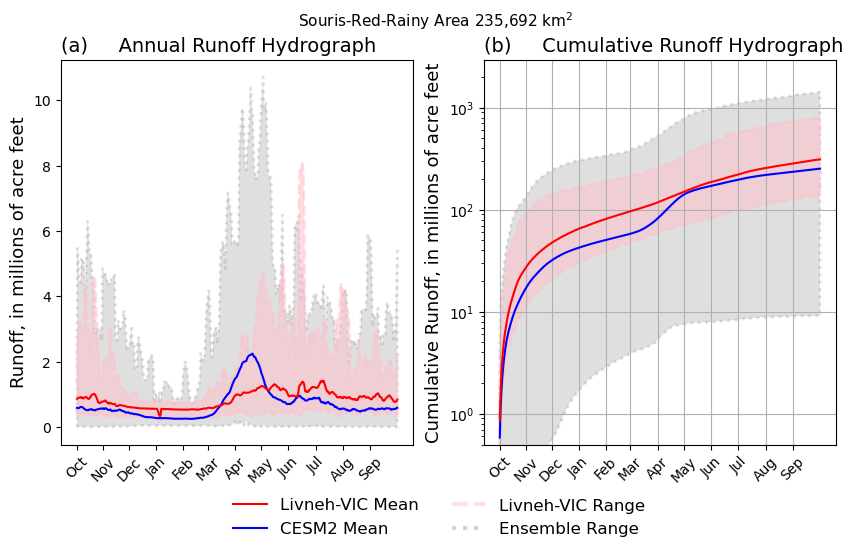

In [36]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5))

# mean runoff per day of year and ensemble range cesm2
ax1.plot(np.arange(len(mean_bydowy_c)), mean_dowy_acrft_c/1e+6, color='blue') # convert back to million acre feet
ax1.fill_between(np.arange(len(mean_bydowy_c)), max_dowy_acrft_c/1e+6, min_dowy_acrft_c/1e+6, color='grey', alpha=0.25, linestyle=':', linewidth=2)
# livneh range over all years
ax1.plot(np.arange(len(mean_bydowy_l)), mean_dowy_acrft_l/1e+6, color='red') # convert back to million acre feet
ax1.fill_between(np.arange(len(mean_bydowy_l)), max_dowy_acrft_l/1e+6, min_dowy_acrft_l/1e+6, color='pink', alpha=0.5, linewidth=2, linestyle='--')

# cumulative mean runoff per day of year and ensemble range cesm2
ax2.semilogy(cuml_acrft_c/1e+6, color='blue')
ax2.fill_between(np.arange(len(cuml_wy_c)),cuml_mx_acrft_c/1e+6,cuml_mn_acrft_c/1e+6, color='grey', alpha=0.25, linestyle=':', linewidth=2)
# livneh range over all years
ax2.semilogy(cuml_acrft_l/1e+6, color='red')
ax2.fill_between(np.arange(len(cuml_wy_l)),cuml_mx_acrft_l/1e+6,cuml_mn_acrft_l/1e+6, color='pink', alpha=0.5,linewidth=2, linestyle="--")
ax2.set_ylim(bottom=0.5)
ax2.grid()

# Remove ticklabels on x axis 
ax1.xaxis.set_ticklabels([])
ax2.xaxis.set_ticklabels([])

ax1.set_ylabel('Runoff, in millions of acre feet', fontsize=13)
ax2.set_ylabel('Cumulative Runoff, in millions of acre feet', fontsize=13)


ax1.set_title("(a)     Annual Runoff Hydrograph", loc='left',fontsize=14)
ax2.set_title("(b)     Cumulative Runoff Hydrograph", loc='left', fontsize=14)

# Re label with water months
gvutil.set_axes_limits_and_ticks(ax1,
                             xticks=wm_tx,
                             xticklabels=wmons,)
ax1.tick_params(axis='x', rotation=45)

gvutil.set_axes_limits_and_ticks(ax2,
                             xticks=wm_tx,
                             xticklabels=wmons,)
ax2.tick_params(axis='x', rotation=45)

# Create legend to go outside plots
blue_line = Line2D([0], [0], color='blue', label='CESM2 Mean')
red_line = Line2D([0], [0], color='red', label='Livneh-VIC Mean')
grey_patch = Line2D([1], [1],color = 'lightgrey', alpha = 1, linestyle = ':', linewidth=3, label='Ensemble Range')
pink_patch = Line2D([1], [1], color='pink',alpha = 0.5, linestyle = '--', linewidth=3, label='Livneh-VIC Range')
# add a legend
plt.legend(handles=[red_line, blue_line,pink_patch, grey_patch],frameon=False, fontsize=12, bbox_to_anchor=(0.5,-.1), ncols=2)
plt.suptitle(r'Souris-Red-Rainy Area 235,692 km$^2$', fontsize=11)

plt.savefig(dir_plot + 'Figure6_RedRainyRunoff.jpg')

plt.show()


## Figure 7

Parde coefficient plots for snow dominated (UC), rain dominated (TN) and transition (MR regions). Show the centroid of flow with vertical line.

In [83]:
liv_pard = xr.open_dataset('Data/Parde_daily_Livneh_HUC2_1980-2005.nc').rename_vars({'runoff_avg7_cesm':'q7'})
cesm_pard = xr.open_dataset('Data/Parde_daily_CESM001-010_HUC2_1980-2005.nc').rename_vars({'runoff_avg7':'q7'})
fut_pard = xr.open_dataset('Data/Parde_daily_CESM001-010_HUC2_2040-2070.nc').rename_vars({'runoff_avg7':'q7'})

In [84]:
monthnm = ("Oct","Nov","Dec","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep")
montix = np.arange(0,365,31)
years = np.arange(1980,2006,1)
daytix = np.concatenate([np.arange(270,366,1), np.arange(270)])

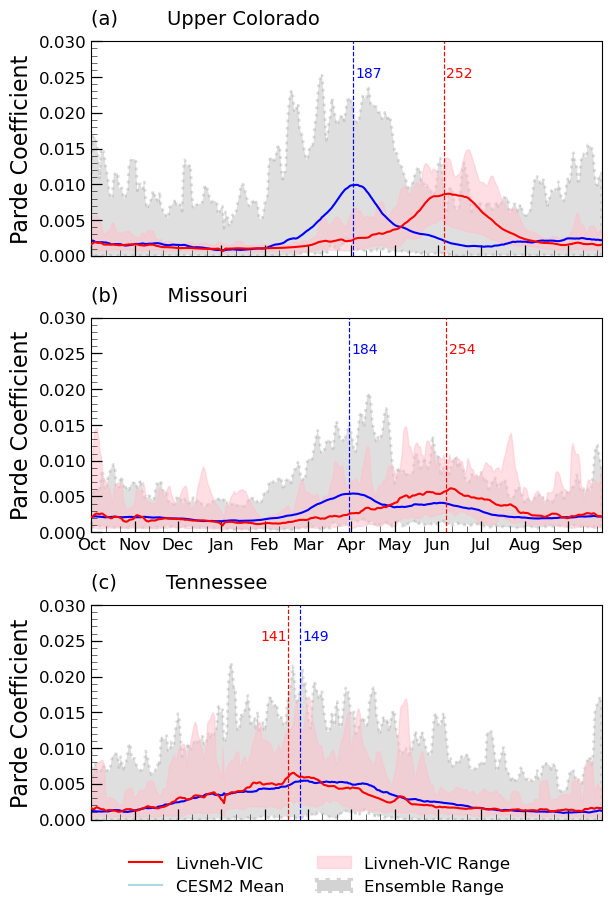

In [85]:
fig = plt.figure(figsize=(6, 9), constrained_layout=True)
spec = gridspec.GridSpec(ncols=1, nrows=3, figure=fig)

# Set spacing between subplots, h/wsapce specified as a fraction of the size of the subplot group
fig.set_constrained_layout_pads(hspace=0.07, wspace=0.03)

# Add the subplots
ax1 = fig.add_subplot(spec[0])  # upper 
ax2 = fig.add_subplot(spec[2])  # bottom. Switch the order of missouri and tennessee
ax3 = fig.add_subplot(spec[1])  # middle

#Figure a snow dominated
# Upper Colorado

foo = cesm_pard.q7.sel(date=slice('1980-10-01','2005-09-30')).groupby('date.dayofyear').mean(('member','date')).sel(region=8)
ax1.plot(np.arange(len(foo)),foo[daytix],color='blue')
foomx = cesm_pard.q7.sel(date=slice('1980-10-01','2005-09-30')).groupby('date.dayofyear').max(('member','date')).sel(region=8)
foomn = cesm_pard.q7.sel(date=slice('1980-10-01','2005-09-30')).groupby('date.dayofyear').min(('member','date')).sel(region=8)
ax1.fill_between(np.arange(len(foo)), foomx[daytix], foomn[daytix], color='grey', alpha=0.25, linestyle=":", linewidth=2)

l = liv_pard.q7.sel(region=8).sel(Time=slice('1980-10-01','2005-09-30')).groupby('Time.dayofyear').mean('Time')
lmx = liv_pard.q7.sel(region=8).sel(Time=slice('1980-10-01','2005-09-30')).groupby('Time.dayofyear').max('Time')
lmn = liv_pard.q7.sel(region=8).sel(Time=slice('1980-10-01','2005-09-30')).groupby('Time.dayofyear').min('Time')
ax1.plot(np.arange(len(l)),l[daytix],color='red', zorder=10)
ax1.fill_between(np.arange(len(l)), lmx[daytix], lmn[daytix], color='pink', alpha=0.5)

## Days since start of water year to peak
dc = foo.argmax()+93
dl = l.argmax()+93

ax1.axvline(x=dc, color='blue', linewidth=0.85, linestyle= "dashed")
ax1.axvline(x=dl, color='red', linewidth=0.85, linestyle= "dashed")

ax1.annotate(int(dc), xy=(dc+2, 0.025), color='blue')
ax1.annotate(int(dl), xy=(dl+2, 0.025), color='red')


# Rain dominated 
# Tennessee
foo = cesm_pard.q7.sel(date=slice('1980-10-01','2005-09-30')).groupby('date.dayofyear').mean(('member','date')).sel(region=0)
ax2.plot(np.arange(len(foo)),foo[daytix],color='blue')
foomx = cesm_pard.q7.sel(date=slice('1980-10-01','2005-09-30')).groupby('date.dayofyear').max(('member','date')).sel(region=0)
foomn = cesm_pard.q7.sel(date=slice('1980-10-01','2005-09-30')).groupby('date.dayofyear').min(('member','date')).sel(region=0)
ax2.fill_between(np.arange(len(foo)), foomx[daytix], foomn[daytix], color='grey', alpha=0.25, linestyle=":", linewidth=2)

# add in individual obs years
l = liv_pard.q7.sel(region=0).sel(Time=slice('1980-10-01','2005-09-30')).groupby('Time.dayofyear').mean('Time')
lmx = liv_pard.q7.sel(region=0).sel(Time=slice('1980-10-01','2005-09-30')).groupby('Time.dayofyear').max('Time')
lmn = liv_pard.q7.sel(region=0).sel(Time=slice('1980-10-01','2005-09-30')).groupby('Time.dayofyear').min('Time')
ax2.plot(np.arange(len(l)),l[daytix],color='red', zorder=10)
ax2.fill_between(np.arange(len(l)), lmx[daytix], lmn[daytix], color='pink', alpha=0.5)

## Days since start of water year to peak
dc = foo.argmax()+93
dl = l.argmax()+93

ax2.axvline(x=dc, color='blue', linewidth=0.85, linestyle= "dashed")
ax2.axvline(x=dl, color='red', linewidth=0.85, linestyle= "dashed")

ax2.annotate(int(dc), xy=(dc+2, 0.025), color='blue')
ax2.annotate(int(dl), xy=(dl-20, 0.025), color='red')

# Missouri
foo = cesm_pard.q7.sel(date=slice('1980-10-01','2005-09-30')).groupby('date.dayofyear').mean(('member','date')).sel(region=7)
ax3.plot(np.arange(len(foo)),foo[daytix],color='blue', label="CESM2")
foomx = cesm_pard.q7.sel(date=slice('1980-10-01','2005-09-30')).groupby('date.dayofyear').max(('member','date')).sel(region=7)
foomn = cesm_pard.q7.sel(date=slice('1980-10-01','2005-09-30')).groupby('date.dayofyear').min(('member','date')).sel(region=7)
ax3.fill_between(np.arange(len(foo)), foomx[daytix], foomn[daytix], color='grey', alpha=0.25, linestyle=":", linewidth=2)

# add livneh and envelope
l = liv_pard.q7.sel(region=7).sel(Time=slice('1980-10-01','2005-09-30')).groupby('Time.dayofyear').mean('Time')
lmx = liv_pard.q7.sel(region=7).sel(Time=slice('1980-10-01','2005-09-30')).groupby('Time.dayofyear').max('Time')
lmn = liv_pard.q7.sel(region=7).sel(Time=slice('1980-10-01','2005-09-30')).groupby('Time.dayofyear').min('Time')
ax3.plot(np.arange(len(l)),l[daytix],color='red', zorder=10)
ax3.fill_between(np.arange(len(l)), lmx[daytix], lmn[daytix], color='pink', alpha=0.5)

## Days since start of water year to peak
dc = foo.argmax()+93
dl = l.argmax()+93

ax3.axvline(x=dc, color='blue', linewidth=0.85, linestyle= "dashed")
ax3.axvline(x=dl, color='red', linewidth=0.85, linestyle= "dashed")

ax3.annotate(int(dc), xy=(dc+2, 0.025), color='blue')
ax3.annotate(int(dl), xy=(dl+2, 0.025), color='red')


gvutil.set_axes_limits_and_ticks(ax = ax1,xticklabels=monthnm,xticks=montix)
gvutil.set_axes_limits_and_ticks(ax = ax2,xticklabels=monthnm,xticks=montix)           
gvutil.set_axes_limits_and_ticks(ax = ax3,xticklabels=monthnm,xticks=montix)
           

# Use geocat.viz.util convenience function to add minor and major tick lines
gvutil.add_major_minor_ticks(ax1,
                                 y_minor_per_major=5,
                                 labelsize=12)
ax1.tick_params(direction='in', which='both', right=False, top=False, labelbottom=True)
ax1.set_ylim(0,0.03)
ax1.set_xlim(0,365)
ax1.xaxis.set_ticklabels([])

                    
gvutil.add_major_minor_ticks(ax2,
                                 y_minor_per_major=5,
                                 labelsize=12)
ax2.tick_params(direction='in', which='both', right=False, top=False, labelbottom=True)
ax2.set_ylim(0,0.03)
ax2.set_xlim(0,365)
ax2.xaxis.set_ticklabels([])

gvutil.add_major_minor_ticks(ax3,
                                 y_minor_per_major=5,
                                 labelsize=12)
ax3.tick_params(direction='in', which='both', right=False, top=False, labelbottom=True)
ax3.set_ylim(0,0.03)
ax3.set_xlim(0,365)

# Use geocat.viz.util convenience function to set titles and labels
gvutil.set_titles_and_labels(ax1, ylabel='Parde Coefficient', xlabel='',
                                #maintitle="Upper Colorado", maintitlefontsize=12,
                                lefttitle="(a)        Upper Colorado", lefttitlefontsize=14)
gvutil.set_titles_and_labels(ax2, ylabel='Parde Coefficient', xlabel='',
                                #maintitle="Tennessee", maintitlefontsize=12,
                                lefttitle="(c)        Tennessee", lefttitlefontsize=14)
gvutil.set_titles_and_labels(ax3, ylabel='Parde Coefficient', xlabel='',
                                #maintitle="Missouri", maintitlefontsize=12,
                                lefttitle="(b)        Missouri", lefttitlefontsize=14)

blue_line = Line2D([0], [0], color='lightblue', label='CESM2 Mean')
red_line = Line2D([0], [0], color='red', label='Livneh-VIC')
grey_patch = patches.Patch(color = 'lightgrey', alpha = 1, linestyle = ':', linewidth=3, label='Ensemble Range')
pink_patch = patches.Patch(color='pink', alpha=0.5, label='Livneh-VIC Range')
# add a legend
ax2.legend(handles=[red_line, blue_line, pink_patch, grey_patch], frameon=False, fontsize=12, bbox_to_anchor=(0.85,-.1), ncols=2)

plt.savefig(dir_plot + 'Figure7_Parde_shade.png')
plt.show()

## Figure 9

Current, observed and future boxplots of P95tot for all HUC2 regions
""
Show as Percentage of annual total, not proportion.

In [57]:
cesmp95 = p95_cesm.P95Tot.stack(z=('year', 'member'))*100
cesmn95 = n95_cesm.N95.stack(z=('year', 'member'))*100

livp95 = p95_liv.P95Tot*100
livn95 = n95_liv.N95*100

futp95 = p95_fut.P95Tot.stack(z=('year', 'member'))*100
futn95 = n95_fut.N95.stack(z=('year', 'member'))*100

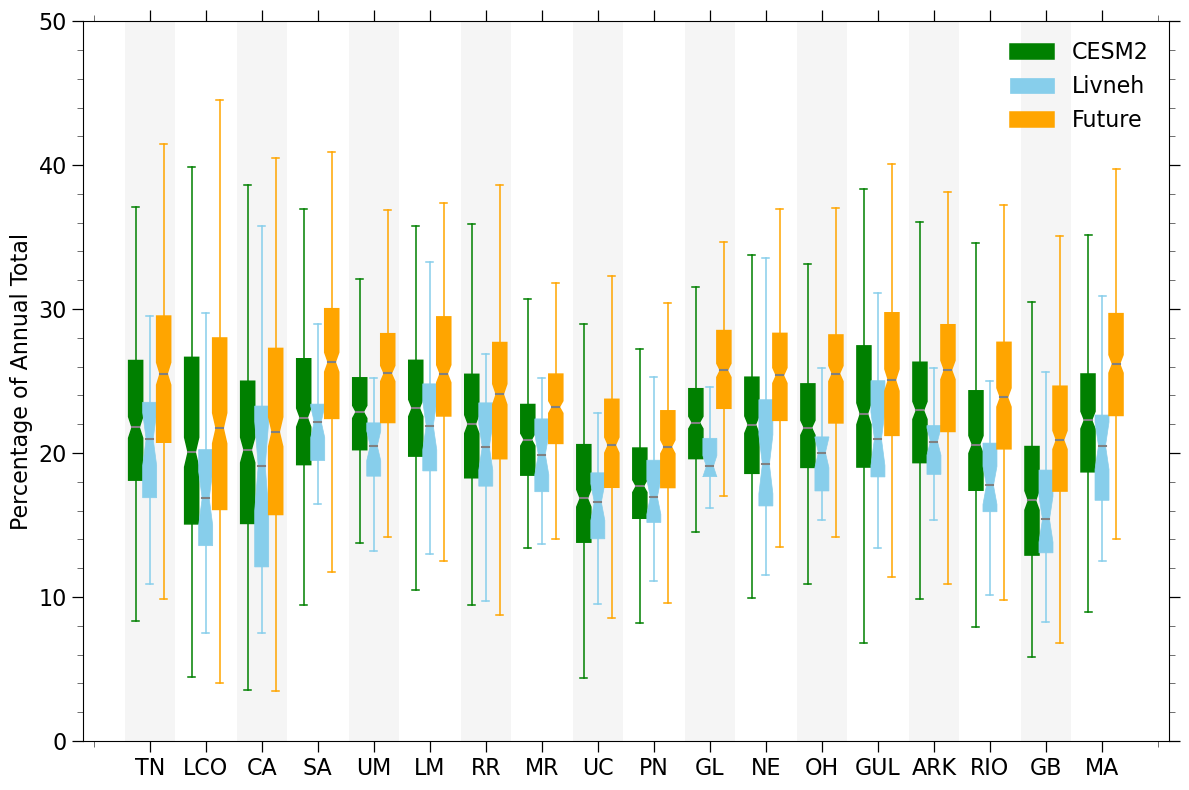

In [59]:
fig, ax = plt.subplots(1,
                           1,
                           figsize=(12, 8))

    # Using a dictionary makes it easy to reuse the same keyword arguments twice for the contours
kwargs = dict(
        widths=0.25,  # box width
        showfliers=False, # extreme extents
        patch_artist=True, # colour boxes
        showmeans = False,
        notch=True,
        medianprops={"color": "gray", "linewidth": 1.5},
)

    # transform data throughout to have regions then data
posc = np.arange(cesmp95.shape[0]) - 0.25
posl = np.arange(livp95.shape[1])
posf = np.arange(futp95.shape[0]) + 0.25

xposition = np.arange(0,18,2)
for xc in xposition:
        ax.axvline(x=xc, color='whitesmoke', linestyle='-', linewidth=36)

bp1 = ax.boxplot(cesmp95.T,
                         positions=posc,
                         manage_ticks=False,
                              boxprops={"facecolor": "green", "edgecolor": "green",
                                  "linewidth": 1.1},
                             whiskerprops={"color": "green", "linewidth": 1.1},
                            capprops={"color": "green", "linewidth": 1.1}, 
                           **kwargs,
                           )

bp2 = ax.boxplot(livp95,
                         positions=posl,
                         labels=hucname,
                         boxprops={"facecolor": "skyblue", "edgecolor": "skyblue",
                                  "linewidth": 0.5},
                                whiskerprops={"color": "skyblue", "linewidth": 1.1},
                                capprops={"color": "skyblue", "linewidth": 1.1},
                        manage_ticks=False,
                           **kwargs,
                           )

bp3 = ax.boxplot(futp95.T,
                         positions=posf,
                         manage_ticks=False,
                              boxprops={"facecolor": "orange", "edgecolor": "orange",
                                  "linewidth": 1.1},
                             whiskerprops={"color": "orange", "linewidth": 1.1},
                            capprops={"color": "orange", "linewidth": 1.1}, 
                           **kwargs,
                           )

# format axes
gvutil.add_major_minor_ticks(ax,
                                 x_minor_per_major=1,
                                     y_minor_per_major=5,
                                     labelsize=16)
# Use geocat.viz.util convenience function to add title to the plot axis.
gvutil.set_titles_and_labels(ax, ylabel='Percentage of Annual Total')
#gvutil.set_tick_direction_spine_visibility(ax, tick_direction='out', top_spine_visible=False, bottom_spine_visible=True, left_spine_visible=True, right_spine_visible=False)
gvutil.set_axes_limits_and_ticks(ax = ax,xticklabels=hucref,xticks=range(18), ylim=(0,50))

ax.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0]], ["CESM2", "Livneh","Future"], fontsize=16, frameon=False)


        # Display Plot
plt.tight_layout()
plt.savefig(dir_plot +'Figure9_P95tBoxPlot_percent.png')
plt.show()
plt.close()

## Figure 10

Current and projected time series of frequency of very heavy rain days and contribution to annual total for California.

In [49]:
# Calculate the standard deviation of each member time series, per region.
# test significance of difference between 10 samples of std

n95_c_st = n95_cesm.std('year')
n95_f_st = n95_fut.std('year')
p95_c_st = p95_cesm.std('year')
p95_f_st = p95_fut.std('year')

from scipy import stats

n95_sig = stats.ttest_ind(n95_c_st.N95, n95_f_st.N95).pvalue
p95_sig = stats.ttest_ind(p95_c_st.P95Tot, p95_f_st.P95Tot).pvalue

# changes in interannual variability
n95_st_diff = n95_f_st.N95.mean('member') - n95_c_st.N95.mean('member')
p95_st_diff = p95_f_st.P95Tot.mean('member') - p95_c_st.P95Tot.mean('member')

In [56]:
p95_st_diff*100*10

<xarray.DataArray 'P95Tot' (regname: 18)>
array([ 4.100192  ,  5.7955456 ,  4.851766  ,  3.2140017 ,  5.1540284 ,
        4.4934525 ,  4.204411  ,  0.175789  ,  0.6342046 ,  1.2772865 ,
        2.9743686 , -0.03464893,  1.539372  ,  0.97335505, -0.56032467,
        3.5284793 ,  7.7789836 ,  1.9754804 ], dtype=float32)
Coordinates:
    region   (regname) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17
  * regname  (regname) object 'TN' 'LCO' 'CA' 'SA' ... 'ARK' 'RIO' 'GB' 'MA'

In [54]:
p95_cesm.P95Tot.mean(['year', 'member'])*100

<xarray.DataArray 'P95Tot' (regname: 18)>
array([22.220354, 20.69147 , 20.471134, 22.907343, 22.848087, 23.231714,
       21.942638, 21.067614, 17.174063, 17.81459 , 22.262888, 22.048168,
       21.894142, 23.011757, 22.872744, 20.81147 , 16.943338, 22.31469 ],
      dtype=float32)
Coordinates:
    region   (regname) int64 ...
  * regname  (regname) object 'TN' 'LCO' 'CA' 'SA' ... 'ARK' 'RIO' 'GB' 'MA'

In [163]:
# Visualize the standard deviation and significance of changes in heavy rain

# add values to the shape file for plotting. Make these changes per decade
shp_gpd['n95diffs'] = n95_st_diff*10
shp_gpd['p95diffs'] = p95_st_diff*1000 # also make a percentage 
shp_gpd['n95sig'] = n95_sig>0.05 # put hatches where data are not significant
shp_gpd['p95sig'] = p95_sig>0.05

s = gpd.GeoSeries(shp_gpd.geometry)

centers = s.centroid.get_coordinates()

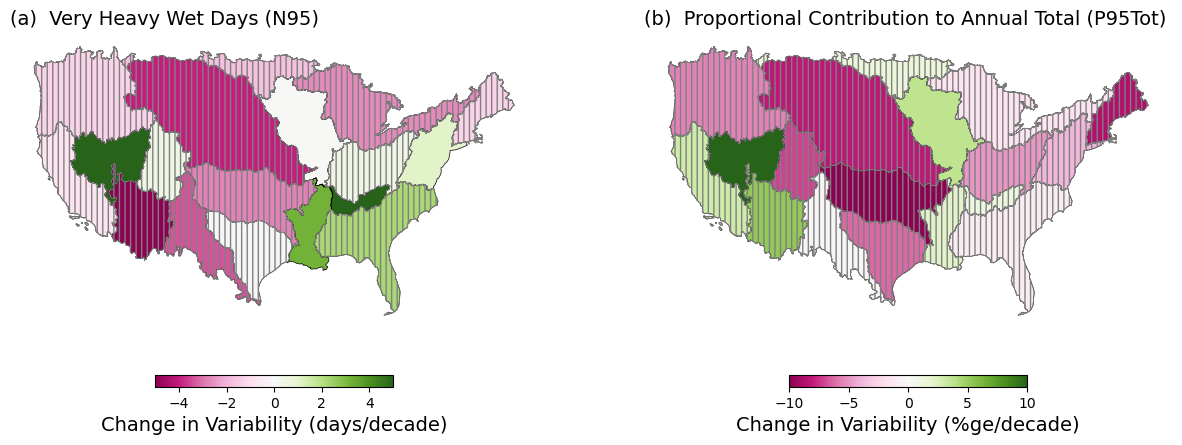

In [168]:
# set range for choropleth
cmap = 'PiYG'

fig = plt.figure(figsize = (15,6))

spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)


# Add the subplots left col N95, right col P95t
ax1 = fig.add_subplot(spec[0])  # upper left cell of grid
ax2 = fig.add_subplot(spec[1])  # row2 left cell of grid

# hatch information
kwarg3s = {'facecolor': 'None', 'edgecolor': 'grey', 'linewidth': 0.5, 'hatch': '|||'}

n95notsig = shp_gpd[shp_gpd.n95sig == True]
p95notsig = shp_gpd[shp_gpd.p95sig == True]

# a Change variability of N95 per decade

shp_gpd.plot(column='n95diffs', cmap=cmap, linewidth=0.5, ax = ax1, edgecolor='k');
n95notsig.plot(zorder=11, ax=ax1, **kwarg3s)

ax1.axis('off')

# create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=cmap,
    norm=plt.Normalize(vmin=-5, vmax=5))
# empty array for the data range
sm._A = []
# add colorbar to the figure
cbar = fig.colorbar(sm, location='bottom', shrink=0.45, pad = 0.1, ax=ax1)
cbar.set_label('Change in Variability (days/decade)', fontsize=14)

# b Change in proportional contribution
shp_gpd.plot(column='p95diffs', cmap=cmap, linewidth=0.5, ax = ax2, edgecolor='k');
p95notsig.plot(zorder=11, ax=ax2, **kwarg3s)

ax2.axis('off')

# create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=cmap,
    norm=plt.Normalize(vmin=-10, vmax=10))
# empty array for the data range
sm._A = []
# add colorbar to the figure
cbar = fig.colorbar(sm, location='bottom', shrink=0.45, pad = 0.1, ax=ax2)
cbar.set_label('Change in Variability (%ge/decade)', fontsize = 14)


ax1.set_title("(a)  Very Heavy Wet Days (N95)", loc='left',fontsize=14)
ax2.set_title("(b)  Proportional Contribution to Annual Total (P95Tot)", loc='left', fontsize=14)


plt.savefig(dir_plot + 'Figure9_N95_P95t_hatches.png')
plt.show();

## Figure 10 

Changes in stream flow for north east and mid Atlantic. Showing current, projected and change in day of peak.

In [86]:
yearf = np.arange(2040,2070,1)

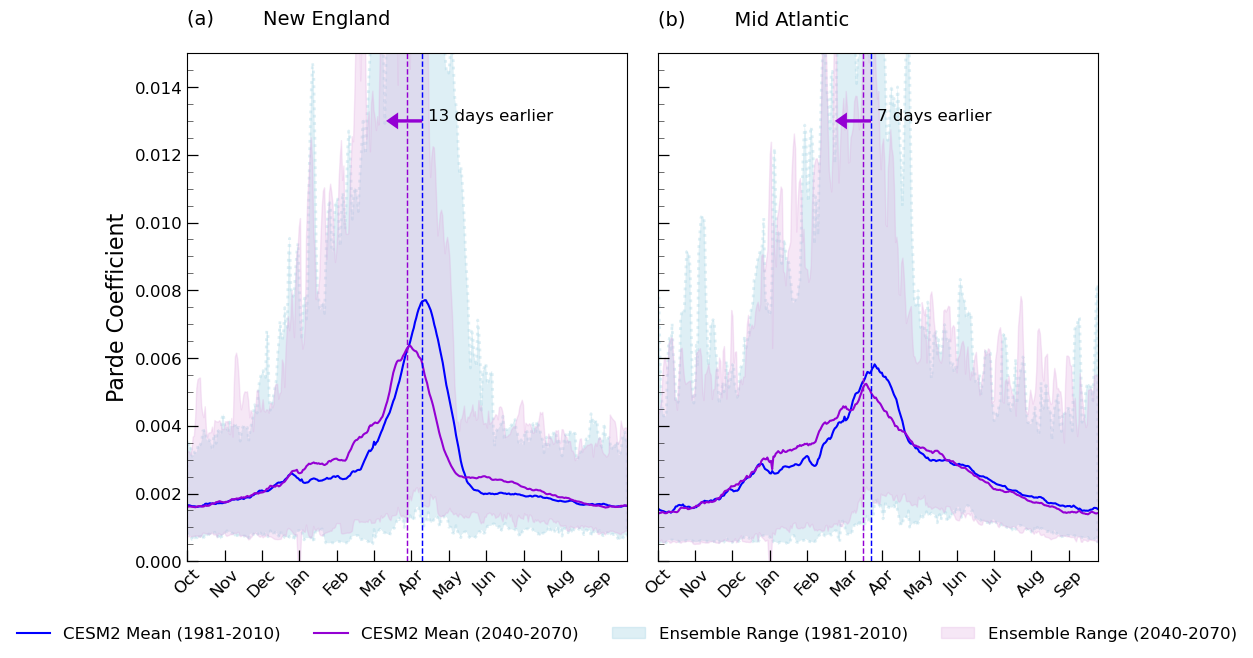

In [46]:
fig = plt.figure(figsize=(10, 6), constrained_layout=True)
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

# Set spacing between subplots, h/wsapce specified as a fraction of the size of the subplot group
fig.set_constrained_layout_pads(hspace=0.07, wspace=0.03)

# Add the subplots
ax1 = fig.add_subplot(spec[0])  # left 
ax2 = fig.add_subplot(spec[1])  # right


#Figure a New England region
foo = cesm_pard.q7.sel(date=slice('1980-10-01','2005-09-30')).groupby('date.dayofyear').mean(('member','date')).sel(region=11)
boo = fut_pard.q7.sel(date=slice('2040-10-01', '2070-09-30')).groupby('date.dayofyear').mean(('member', 'date')).sel(region=11)
ax1.plot(np.arange(len(foo)),foo[daytix],color='blue')
ax1.plot(np.arange(len(boo)),boo[daytix],color='darkviolet')
foomx = cesm_pard.q7.sel(date=slice('1980-10-01','2005-09-30')).groupby('date.dayofyear').max(('member','date')).sel(region=11)
foomn = cesm_pard.q7.sel(date=slice('1980-10-01','2005-09-30')).groupby('date.dayofyear').min(('member','date')).sel(region=11)
boomx = fut_pard.q7.sel(date=slice('2040-10-01','2070-09-30')).groupby('date.dayofyear').max(('member','date')).sel(region=11)
boomn = fut_pard.q7.sel(date=slice('2040-10-01','2070-09-30')).groupby('date.dayofyear').min(('member','date')).sel(region=11)
ax1.fill_between(np.arange(len(foo)), foomx[daytix], foomn[daytix], color='lightblue', alpha=0.4, linestyle=":", linewidth=2)
ax1.fill_between(np.arange(len(boo)), boomx[daytix], boomn[daytix], color='plum', alpha=0.25)



dc = foo.argmax()+93
df = boo.argmax()+93
diffs = dc - df
ax1.axvline(x=dc, color='blue', linewidth=1.05, linestyle= "dashed")
ax1.axvline(x=df, color='darkviolet', linewidth=1.05, linestyle= "dashed")
ax1.arrow(x=dc, y=0.013,dx=-30, dy=0,facecolor='darkviolet', edgecolor='none', length_includes_head=True,
          head_width=.0005, head_length=10, width=0.0001)
ax1.annotate(f'{int(diffs)} days earlier', xy=(dc+5,0.013), fontsize=12)


#Figure b Mid Atlantic region

foo = cesm_pard.q7.sel(date=slice('1980-10-01','2005-09-30')).groupby('date.dayofyear').mean(('member','date')).sel(region=17)
boo = fut_pard.q7.sel(date=slice('2040-10-01', '2070-09-30')).groupby('date.dayofyear').mean(('member', 'date')).sel(region=17)
foomx = cesm_pard.q7.sel(date=slice('1980-10-01','2005-09-30')).groupby('date.dayofyear').max(('member','date')).sel(region=17)
foomn = cesm_pard.q7.sel(date=slice('1980-10-01','2005-09-30')).groupby('date.dayofyear').min(('member','date')).sel(region=17)
boomx = fut_pard.q7.sel(date=slice('2040-10-01','2070-09-30')).groupby('date.dayofyear').max(('member','date')).sel(region=17)
boomn = fut_pard.q7.sel(date=slice('2040-10-01','2070-09-30')).groupby('date.dayofyear').min(('member','date')).sel(region=17)
ax2.fill_between(np.arange(len(foo)), foomx[daytix], foomn[daytix], color='lightblue', alpha=0.4, linestyle=":", linewidth=2)
ax2.fill_between(np.arange(len(boo)), boomx[daytix], boomn[daytix], color='plum', alpha=0.25)

dc = foo.argmax()+93
df = boo.argmax()+93
diffs = dc - df
ax2.plot(np.arange(len(foo)),foo[daytix],color='blue', label="1980-2005")
ax2.plot(np.arange(len(boo)),boo[daytix],color='darkviolet', label="2040-2070")
ax2.axvline(x=dc, color='blue', linewidth=1.05, linestyle= "dashed")
ax2.axvline(x=df, color='darkviolet', linewidth=1.05, linestyle= "dashed")


# Set the x axis labels and direction
ax1.set_xticks(labels=monthnm,ticks=montix,rotation=45, fontsize=12)
ax2.set_xticks(labels=monthnm,ticks=montix,rotation=45, fontsize=12)
          

# Use geocat.viz.util convenience function to add minor and major tick lines
gvutil.add_major_minor_ticks(ax1,
                                 y_minor_per_major=4,
                                 labelsize=12,
                                x_minor_per_major=1)
ax1.tick_params(direction='in', which='both', right=False, top=False, labelbottom=True)
ax1.set_ylim(0,0.015)
ax1.set_xlim(0,365)

                    
gvutil.add_major_minor_ticks(ax2,
                                 y_minor_per_major=4,
                                 labelsize=12,
                                x_minor_per_major=1)
ax2.tick_params(direction='in', which='both', right=False, top=False, labelbottom=True)
ax2.set_ylim(0,0.015)
ax2.set_xlim(0,365)
ax2.yaxis.set_ticklabels([])
ax2.arrow(x=dc, y=0.013,dx=-30, dy=0,facecolor='darkviolet', edgecolor='none', length_includes_head=True,
          head_width=.0005, head_length=10, width=0.0001)
ax2.annotate(f'{int(diffs)} days earlier', xy=(dc +5,0.013), fontsize=12)


# Use geocat.viz.util convenience function to set titles and labels
gvutil.set_titles_and_labels(ax1, ylabel='Parde Coefficient', xlabel='',
                                lefttitle="(a)        New England", lefttitlefontsize=14)
gvutil.set_titles_and_labels(ax2, ylabel='', xlabel='',
                                #maintitle="Mid Atlantic", maintitlefontsize=12,
                                lefttitle="(b)        Mid Atlantic", lefttitlefontsize=14)

blue_line = Line2D([0], [0], color='blue', label='CESM2 Mean (1981-2010)')
purple_line = Line2D([0], [0], color='darkviolet', label='CESM2 Mean (2040-2070)')
grey_patch = patches.Patch(color = 'lightblue', alpha = 0.4, label='Ensemble Range (1981-2010)')
pink_patch = patches.Patch(color='plum', alpha=0.25, label='Ensemble Range (2040-2070)')
# add a horizontal legend below the plots
fig.legend(handles=[blue_line, purple_line, grey_patch, pink_patch], frameon=False, fontsize=12, bbox_to_anchor=(1.15,-.01), ncols=4)

plt.savefig(dir_plot + 'Figure11_Future_Parde_shade.png')

plt.show()
